In [1]:
# Ignore warnings
import warnings

warnings.simplefilter(action = "ignore", category = FutureWarning)

# import the necessary Python libraries Numpy, Pandas and Matplotlib with their usual shorthand notation.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
# load dataset 
path = 'loan_data_2007_2014.csv'
df = pd.read_csv(path, index_col=0)
df.head(5)

C:\Users\Acer\AppData\Local\Temp\ipykernel_21976\676722405.py:3: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, index_col=0)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

In [4]:
# Informasi Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

In [5]:
df.duplicated().sum()

0

## Statistical Descriptive

In [6]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,466256.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,0.284678,...,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,0.797365,...,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,3.790000e+04,NaN,NaN,NaN
max,3.809811e+07,4.086083e+07,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,29.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,9.999999e+06,NaN,NaN,NaN


Terdapat Beberapa Kolom yang memiliki NAN value di seluruh barisnya, jadi harus di drop

In [7]:
print('dimensi dataset sebelum di drop = ',df.shape)

df = df.drop(columns=['annual_inc_joint','dti_joint','verification_status_joint','open_acc_6m','open_il_6m','open_il_12m','open_il_24m','mths_since_rcnt_il',
'total_bal_il','il_util','open_rv_12m','open_rv_24m','max_bal_bc','all_util','inq_fi','inq_last_12m','total_cu_tl'], axis=1)

print('dimensi dataset setelah di drop = ',df.shape)

dimensi dataset sebelum di drop =  (466285, 74)
dimensi dataset setelah di drop =  (466285, 57)


In [8]:
categorical = df.select_dtypes(exclude=[np.number])
categorical.columns

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_pymnt_d',
       'next_pymnt_d', 'last_credit_pull_d', 'application_type'],
      dtype='object')

In [9]:
categorical.describe().transpose()

,count,unique,top,freq
term,466285,2,36 months,337953
grade,466285,7,B,136929
sub_grade,466285,35,B3,31686
emp_title,438697,205475,Teacher,5399
emp_length,445277,11,10+ years,150049
home_ownership,466285,6,MORTGAGE,235875
verification_status,466285,3,Verified,168055
issue_d,466285,91,Oct-14,38782
loan_status,466285,9,Current,224226
pymnt_plan,466285,2,n,466276


Dari deskripsi diatas, terdapat beberapa kolom yang mengharuskan untuk di drop karena beberapa kondisi seperti, nilai unique terlalu banyak, kolom yang tidak akan diperlukan dalam modelling, dan kolom hanya ada 1 nilai unique.

In [10]:
print('dimensi dataset sebelum di drop = ',df.shape)

df = df.drop(columns=['url','desc','title','emp_title','zip_code','addr_state','application_type'], axis=1)

print('dimensi dataset setelah di drop = ',df.shape)

dimensi dataset sebelum di drop =  (466285, 57)
dimensi dataset setelah di drop =  (466285, 50)


In [11]:
numerical = df.select_dtypes(include=[np.number])
numerical.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim'],
      dtype='object')

In [12]:
numerical.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,466285.0,1.307973e+07,1.089371e+07,54734.00,3.639987e+06,1.010790e+07,2.073121e+07,3.809811e+07
member_id,466285.0,1.459766e+07,1.168237e+07,70473.00,4.379705e+06,1.194108e+07,2.300154e+07,4.086083e+07
loan_amnt,466285.0,1.431728e+04,8.286509e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt,466285.0,1.429180e+04,8.274371e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt_inv,466285.0,1.422233e+04,8.297638e+03,0.00,8.000000e+03,1.200000e+04,1.995000e+04,3.500000e+04
int_rate,466285.0,1.382924e+01,4.357587e+00,5.42,1.099000e+01,1.366000e+01,1.649000e+01,2.606000e+01
installment,466285.0,4.320612e+02,2.434855e+02,15.67,2.566900e+02,3.798900e+02,5.665800e+02,1.409990e+03
annual_inc,466281.0,7.327738e+04,5.496357e+04,1896.00,4.500000e+04,6.300000e+04,8.896000e+04,7.500000e+06
dti,466285.0,1.721876e+01,7.851121e+00,0.00,1.136000e+01,1.687000e+01,2.278000e+01,3.999000e+01
delinq_2yrs,466256.0,2.846784e-01,7.973651e-01,0.00,0.000000e+00,0.000000e+00,0.000000e+00,2.900000e+01


Drop kolom policy_code karena hanya memiliki 1 value

In [13]:
print('dimensi dataset sebelum di drop = ',df.shape)

df_clean = df.drop(columns=['policy_code'], axis=1)

print('dimensi dataset setelah di drop = ',df_clean.shape)

dimensi dataset sebelum di drop =  (466285, 50)
dimensi dataset setelah di drop =  (466285, 49)


In [14]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 466284
Data columns (total 49 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_length                   445277 non-null  object 
 11  home_ownership               466285 non-null  object 
 12  annual_inc                   466281 non-null  float64
 13 

In [15]:
df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,171.62,NaN,Jan-16,0.0,NaN,1,0.0,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,119.66,NaN,Sep-13,0.0,NaN,1,0.0,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,649.91,NaN,Jan-16,0.0,NaN,1,0.0,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,357.48,NaN,Jan-15,0.0,NaN,1,0.0,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,67.79,Feb-16,Jan-16,0.0,NaN,1,0.0,NaN,NaN,NaN


## Categorical Feature Univariate Analysis

In [16]:
cat = df_clean.select_dtypes(exclude=[np.number])
cat.describe().transpose()

,count,unique,top,freq
term,466285,2,36 months,337953
grade,466285,7,B,136929
sub_grade,466285,35,B3,31686
emp_length,445277,11,10+ years,150049
home_ownership,466285,6,MORTGAGE,235875
verification_status,466285,3,Verified,168055
issue_d,466285,91,Oct-14,38782
loan_status,466285,9,Current,224226
pymnt_plan,466285,2,n,466276
purpose,466285,14,debt_consolidation,274195


In [17]:
cat.isnull().sum()

term                        0
grade                       0
sub_grade                   0
emp_length              21008
home_ownership              0
verification_status         0
issue_d                     0
loan_status                 0
pymnt_plan                  0
purpose                     0
earliest_cr_line           29
initial_list_status         0
last_pymnt_d              376
next_pymnt_d           227214
last_credit_pull_d         42
dtype: int64

In [18]:
for i in cat:
  print('-----'*10)
  print(i)
  print(df[i].value_counts())

--------------------------------------------------
term
 36 months    337953
 60 months    128332
Name: term, dtype: int64
--------------------------------------------------
grade
B    136929
C    125293
D     76888
A     74867
E     35757
F     13229
G      3322
Name: grade, dtype: int64
--------------------------------------------------
sub_grade
B3    31686
B4    30505
C1    26953
C2    26740
B2    26610
C3    25317
B5    25252
C4    24105
B1    22876
C5    22178
A5    21757
D1    19261
A4    19045
D2    17046
D3    14916
D4    14099
A3    12568
D5    11566
A2    10956
A1    10541
E1     9033
E2     8669
E3     6976
E4     5992
E5     5087
F1     3940
F2     3001
F3     2708
F4     2067
F5     1513
G1     1109
G2      823
G3      583
G4      422
G5      385
Name: sub_grade, dtype: int64
--------------------------------------------------
emp_length
10+ years    150049
2 years       41373
3 years       36596
< 1 year      36265
5 years       30774
1 year        29622
4 years       280

In [19]:
df['loan_status'] 

0          Fully Paid
1         Charged Off
2          Fully Paid
3          Fully Paid
4             Current
             ...     
466280        Current
466281    Charged Off
466282        Current
466283     Fully Paid
466284        Current
Name: loan_status, Length: 466285, dtype: object

In [20]:
grade_order = ['A','B','C','D','E','F','G']
df_clean['grade'] = pd.Categorical(df_clean['grade'], categories=grade_order, ordered=True)

In [21]:
subgrade_order = ['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5']
df_clean['sub_grade'] = pd.Categorical(df_clean['sub_grade'], categories=subgrade_order, ordered=True)

In [22]:
length_order = ['< 1 year','1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years']
df_clean['emp_length'] = pd.Categorical(df_clean['emp_length'], categories=length_order, ordered=True)

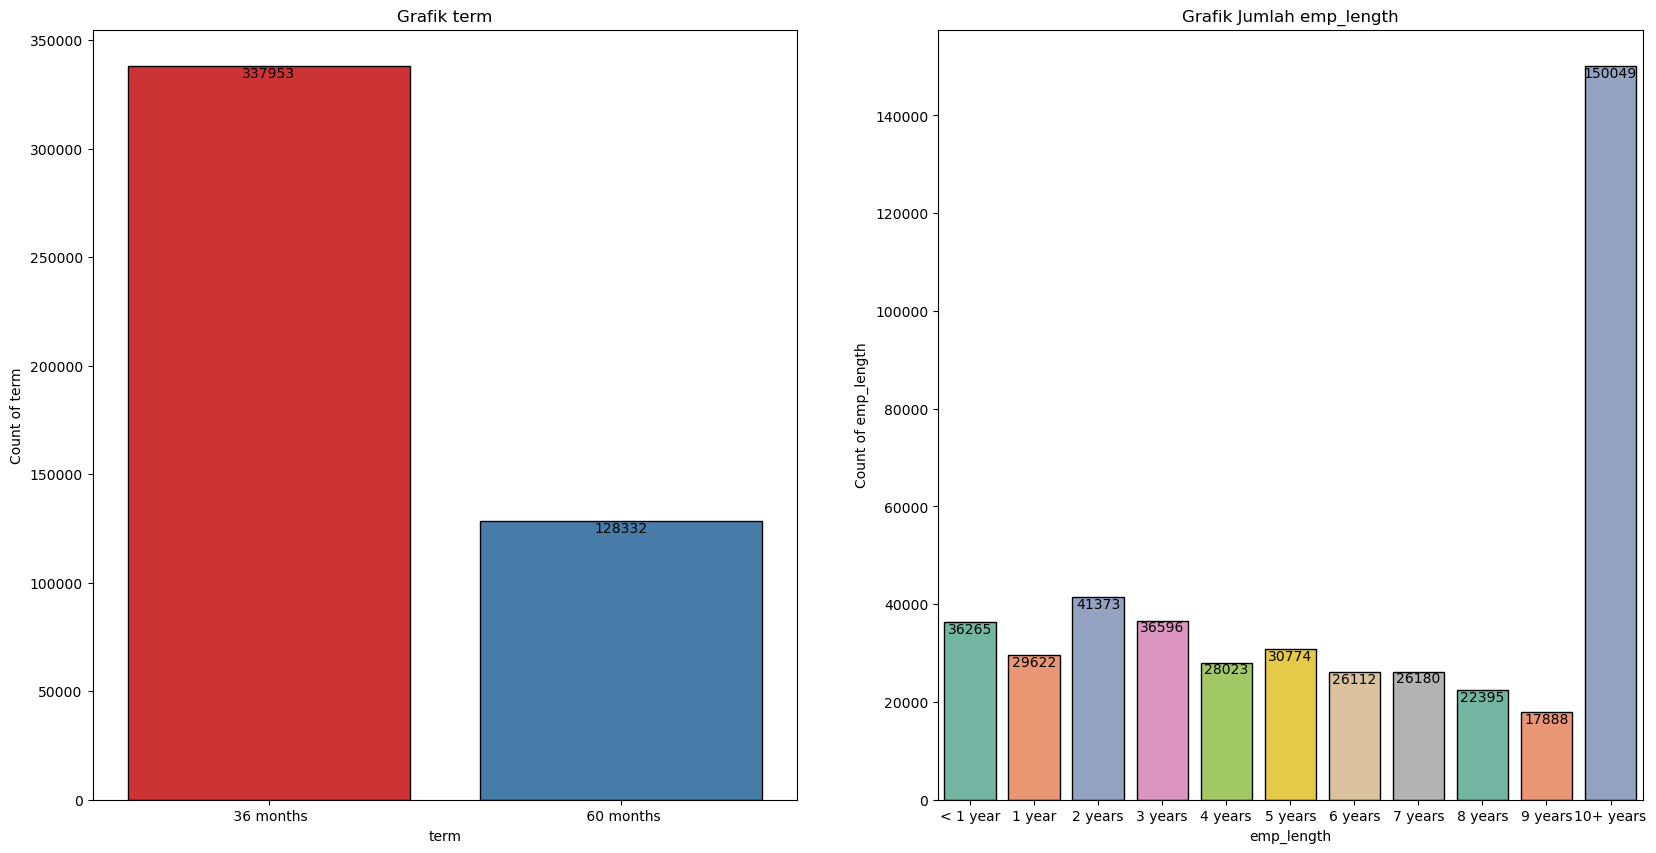

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Create first countplot on first subplot
sns.countplot(x="term", data=df_clean, palette="Set1",
                   edgecolor="black", linewidth=1, ax=ax1)
ax1.set_title("Grafik term")
ax1.set_xlabel("term")
ax1.set_ylabel("Count of term")

for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0,-5),
                    textcoords = 'offset points')

# Create second countplot on second subplot
sns.countplot(x="emp_length", data=df_clean, palette="Set2",
              edgecolor="black", linewidth=1, ax=ax2)
ax2.set_title("Grafik Jumlah emp_length")
ax2.set_xlabel("emp_length")
ax2.set_ylabel("Count of emp_length")

for p in ax2.patches:
    ax2.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0,-5),
                    textcoords = 'offset points')


# Show the plot
plt.show()

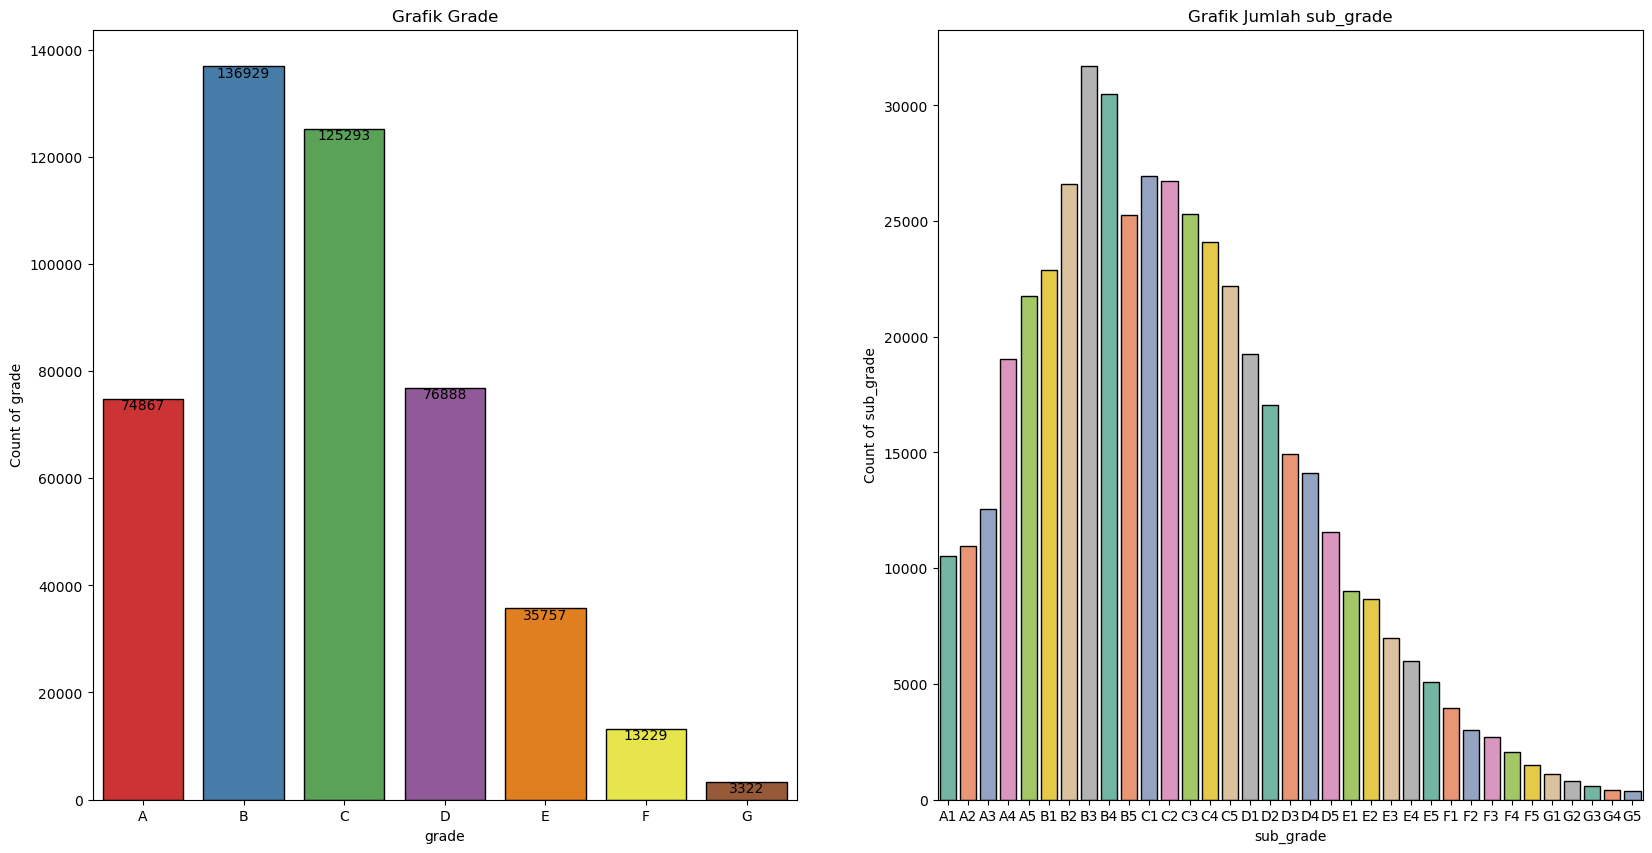

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Create first countplot on first subplot
sns.countplot(x="grade", data=df_clean, palette="Set1",
                   edgecolor="black", linewidth=1, ax=ax1)
ax1.set_title("Grafik Grade")
ax1.set_xlabel("grade")
ax1.set_ylabel("Count of grade")

for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0,-5),
                    textcoords = 'offset points')

# Create second countplot on second subplot
sns.countplot(x="sub_grade", data=df_clean, palette="Set2",
              edgecolor="black", linewidth=1, ax=ax2)
ax2.set_title("Grafik Jumlah sub_grade")
ax2.set_xlabel("sub_grade")
ax2.set_ylabel("Count of sub_grade")


# Show the plot
plt.show()

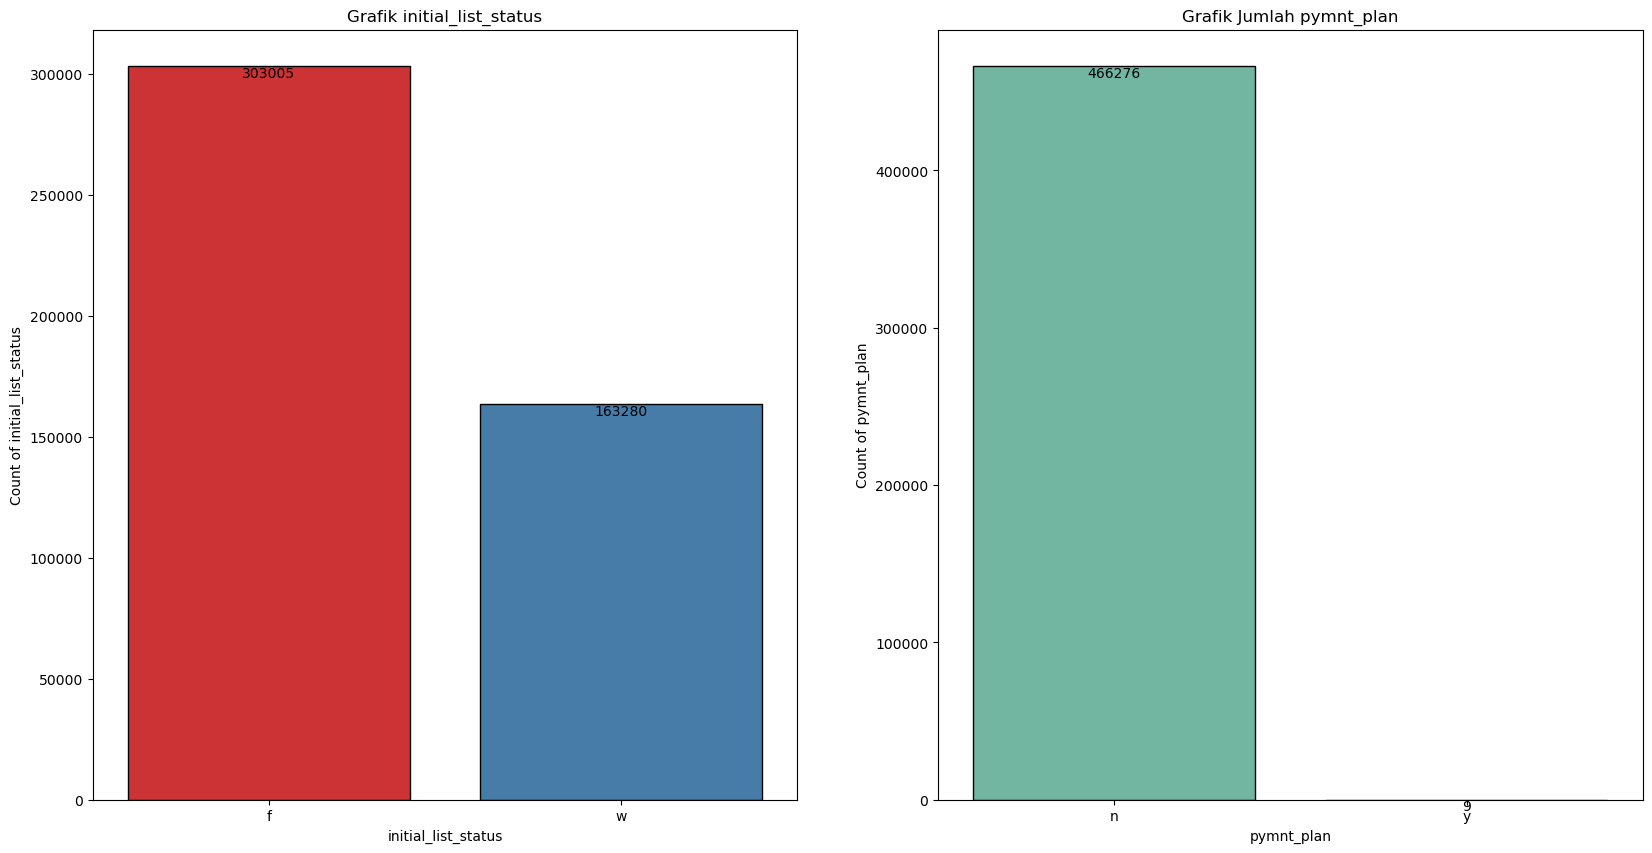

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Create first countplot on first subplot
sns.countplot(x="initial_list_status", data=df_clean, palette="Set1",
                   edgecolor="black", linewidth=1, ax=ax1)
ax1.set_title("Grafik initial_list_status")
ax1.set_xlabel("initial_list_status")
ax1.set_ylabel("Count of initial_list_status")

for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0,-5),
                    textcoords = 'offset points')

# Create second countplot on second subplot
sns.countplot(x="pymnt_plan", data=df_clean, palette="Set2",
              edgecolor="black", linewidth=1, ax=ax2)
ax2.set_title("Grafik Jumlah pymnt_plan")
ax2.set_xlabel("pymnt_plan")
ax2.set_ylabel("Count of pymnt_plan")

for p in ax2.patches:
    ax2.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0,-5),
                    textcoords = 'offset points')


# Show the plot
plt.show()

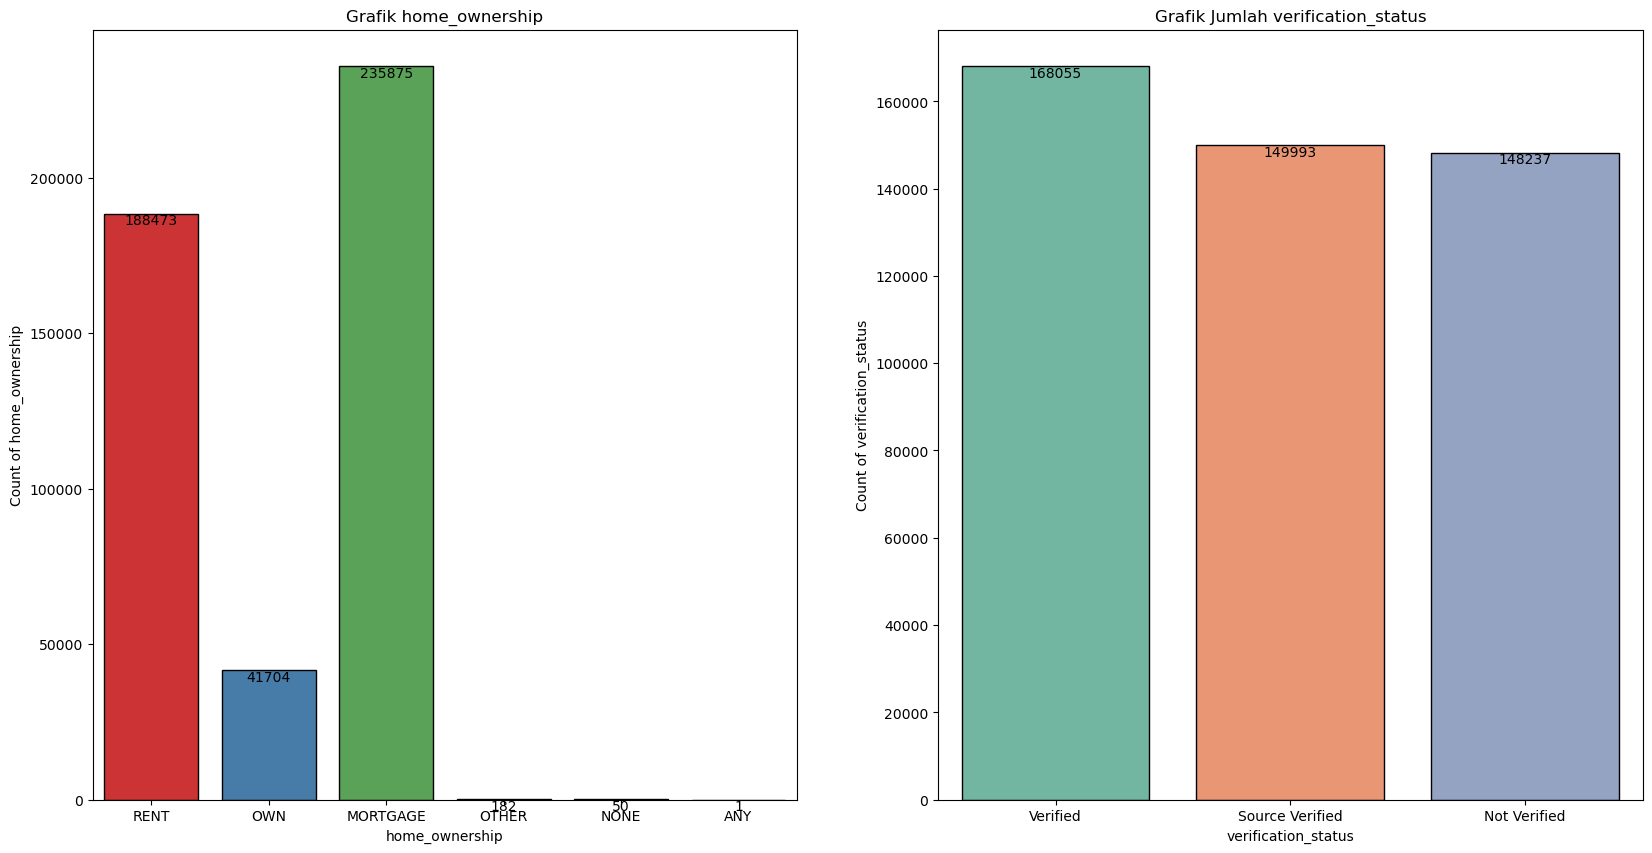

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Create first countplot on first subplot
sns.countplot(x="home_ownership", data=df_clean, palette="Set1",
                   edgecolor="black", linewidth=1, ax=ax1)
ax1.set_title("Grafik home_ownership")
ax1.set_xlabel("home_ownership")
ax1.set_ylabel("Count of home_ownership")

for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0,-5),
                    textcoords = 'offset points')

# Create second countplot on second subplot
sns.countplot(x="verification_status", data=df_clean, palette="Set2",
              edgecolor="black", linewidth=1, ax=ax2)
ax2.set_title("Grafik Jumlah verification_status")
ax2.set_xlabel("verification_status")
ax2.set_ylabel("Count of verification_status")

for p in ax2.patches:
    ax2.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0,-5),
                    textcoords = 'offset points')


# Show the plot
plt.show()

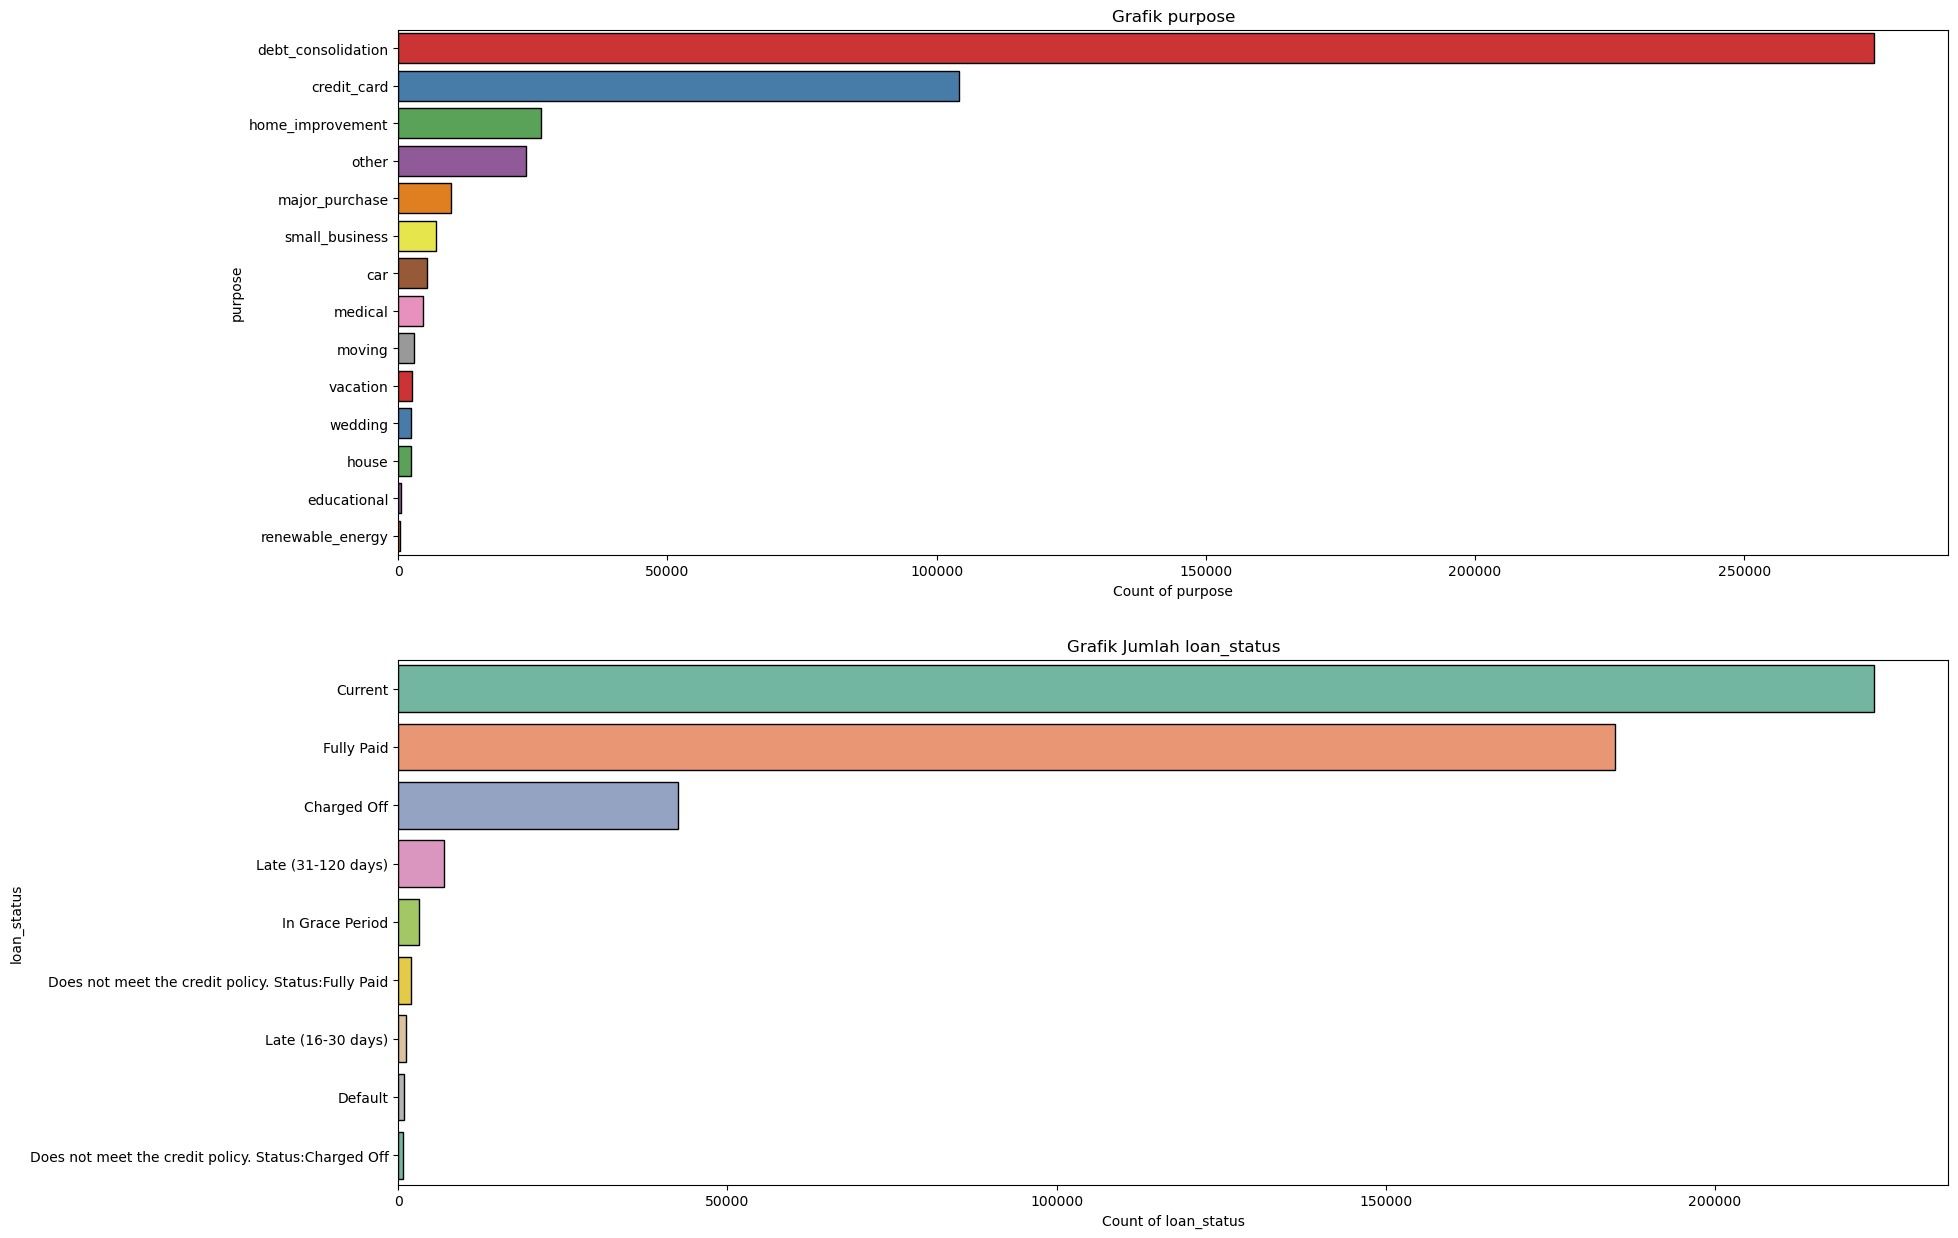

In [27]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 15))

# Create first countplot on first subplot
sns.countplot(y="purpose", data=df_clean, palette="Set1",
                   edgecolor="black", linewidth=1, ax=ax1, order=df_clean['purpose'].value_counts().sort_values(ascending=False).index)
ax1.set_title("Grafik purpose")
ax1.set_xlabel("Count of purpose")
ax1.set_ylabel("purpose")

# Create second countplot on second subplot
sns.countplot(y="loan_status", data=df_clean, palette="Set2",
              edgecolor="black", linewidth=1, ax=ax2, order=df_clean['loan_status'].value_counts().sort_values(ascending=False).index)
ax2.set_title("Grafik Jumlah loan_status")
ax2.set_xlabel("Count of loan_status")
ax2.set_ylabel("loan_status")


# Show the plot
plt.show()

## Numerical Feature Univariate Analysis

In [28]:
numerical = df_clean.select_dtypes(include=[np.number])
numerical.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,466285.0,1.307973e+07,1.089371e+07,54734.00,3.639987e+06,1.010790e+07,2.073121e+07,3.809811e+07
member_id,466285.0,1.459766e+07,1.168237e+07,70473.00,4.379705e+06,1.194108e+07,2.300154e+07,4.086083e+07
loan_amnt,466285.0,1.431728e+04,8.286509e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt,466285.0,1.429180e+04,8.274371e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt_inv,466285.0,1.422233e+04,8.297638e+03,0.00,8.000000e+03,1.200000e+04,1.995000e+04,3.500000e+04
int_rate,466285.0,1.382924e+01,4.357587e+00,5.42,1.099000e+01,1.366000e+01,1.649000e+01,2.606000e+01
installment,466285.0,4.320612e+02,2.434855e+02,15.67,2.566900e+02,3.798900e+02,5.665800e+02,1.409990e+03
annual_inc,466281.0,7.327738e+04,5.496357e+04,1896.00,4.500000e+04,6.300000e+04,8.896000e+04,7.500000e+06
dti,466285.0,1.721876e+01,7.851121e+00,0.00,1.136000e+01,1.687000e+01,2.278000e+01,3.999000e+01
delinq_2yrs,466256.0,2.846784e-01,7.973651e-01,0.00,0.000000e+00,0.000000e+00,0.000000e+00,2.900000e+01


In [29]:
num = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 
        'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 
        'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 
        'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 
        'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 
        'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 
        'mths_since_last_major_derog', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 
        'total_rev_hi_lim']

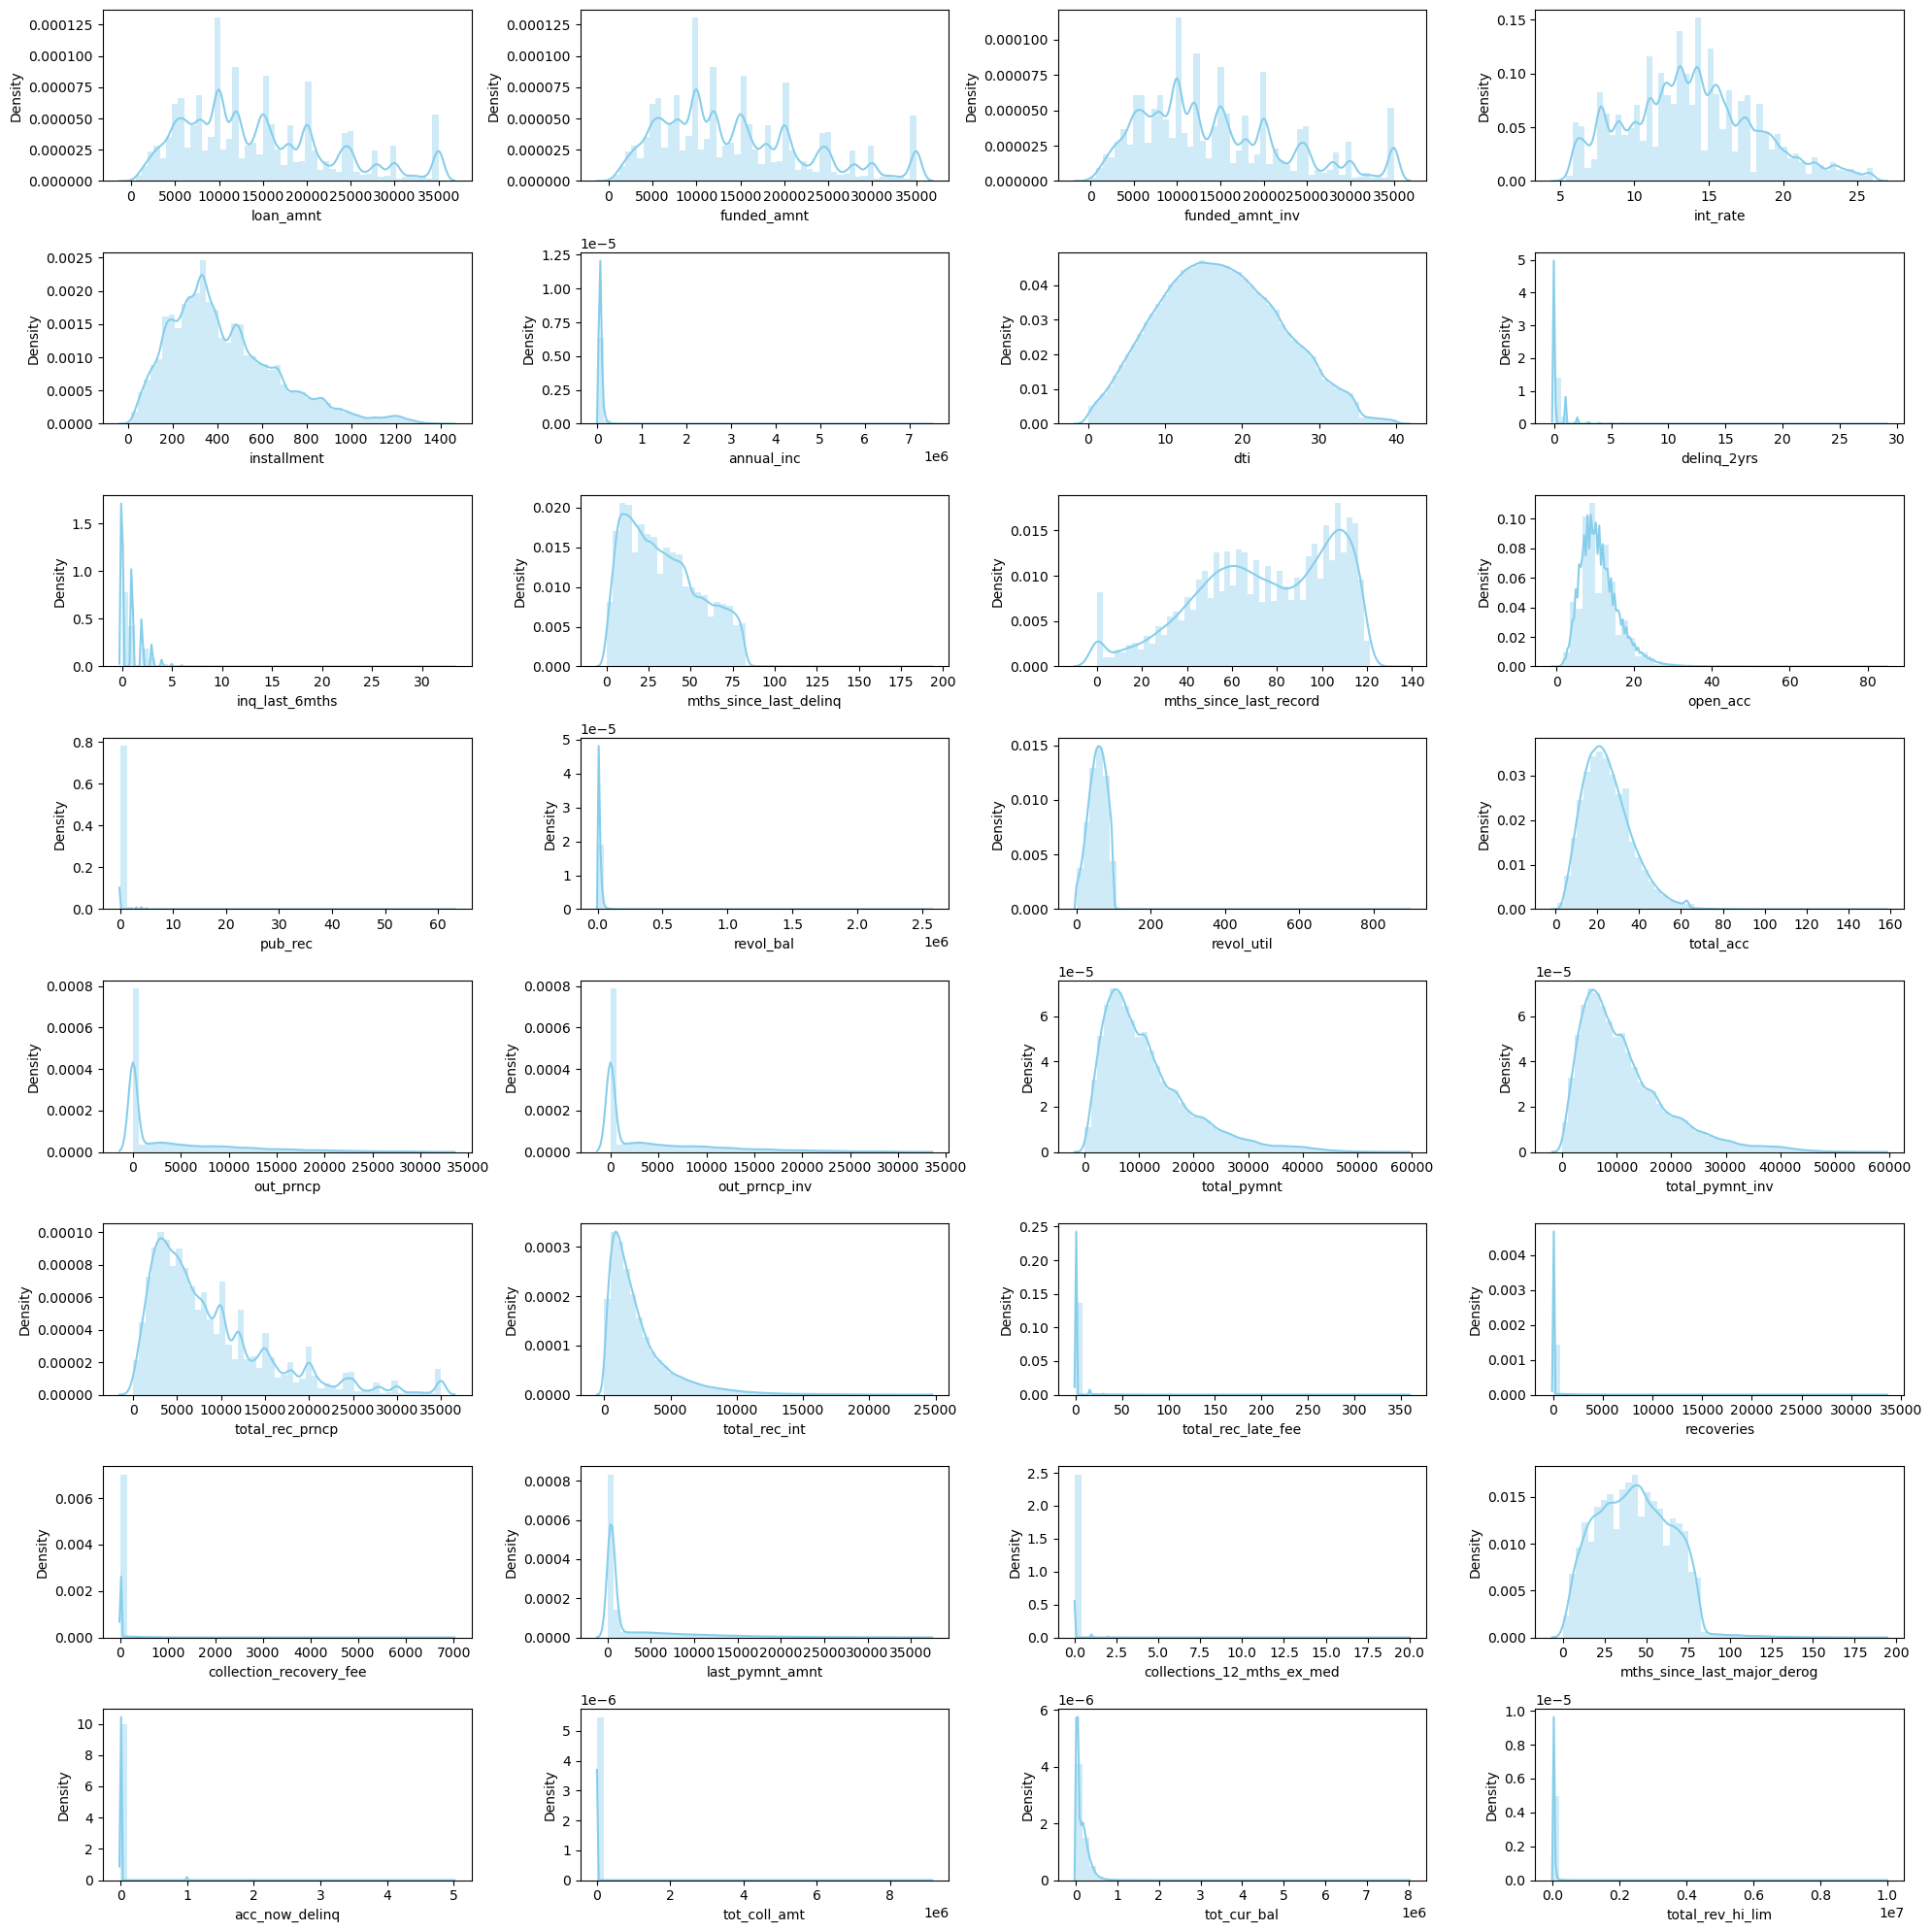

In [30]:
plt.figure(figsize=(20,20))
for i in range(0, len(num)):
    plt.subplot(8, 4, i+1)
    sns.distplot(x=df_clean[num[i]], color='skyblue')
    plt.xlabel(num[i])
    plt.tight_layout()

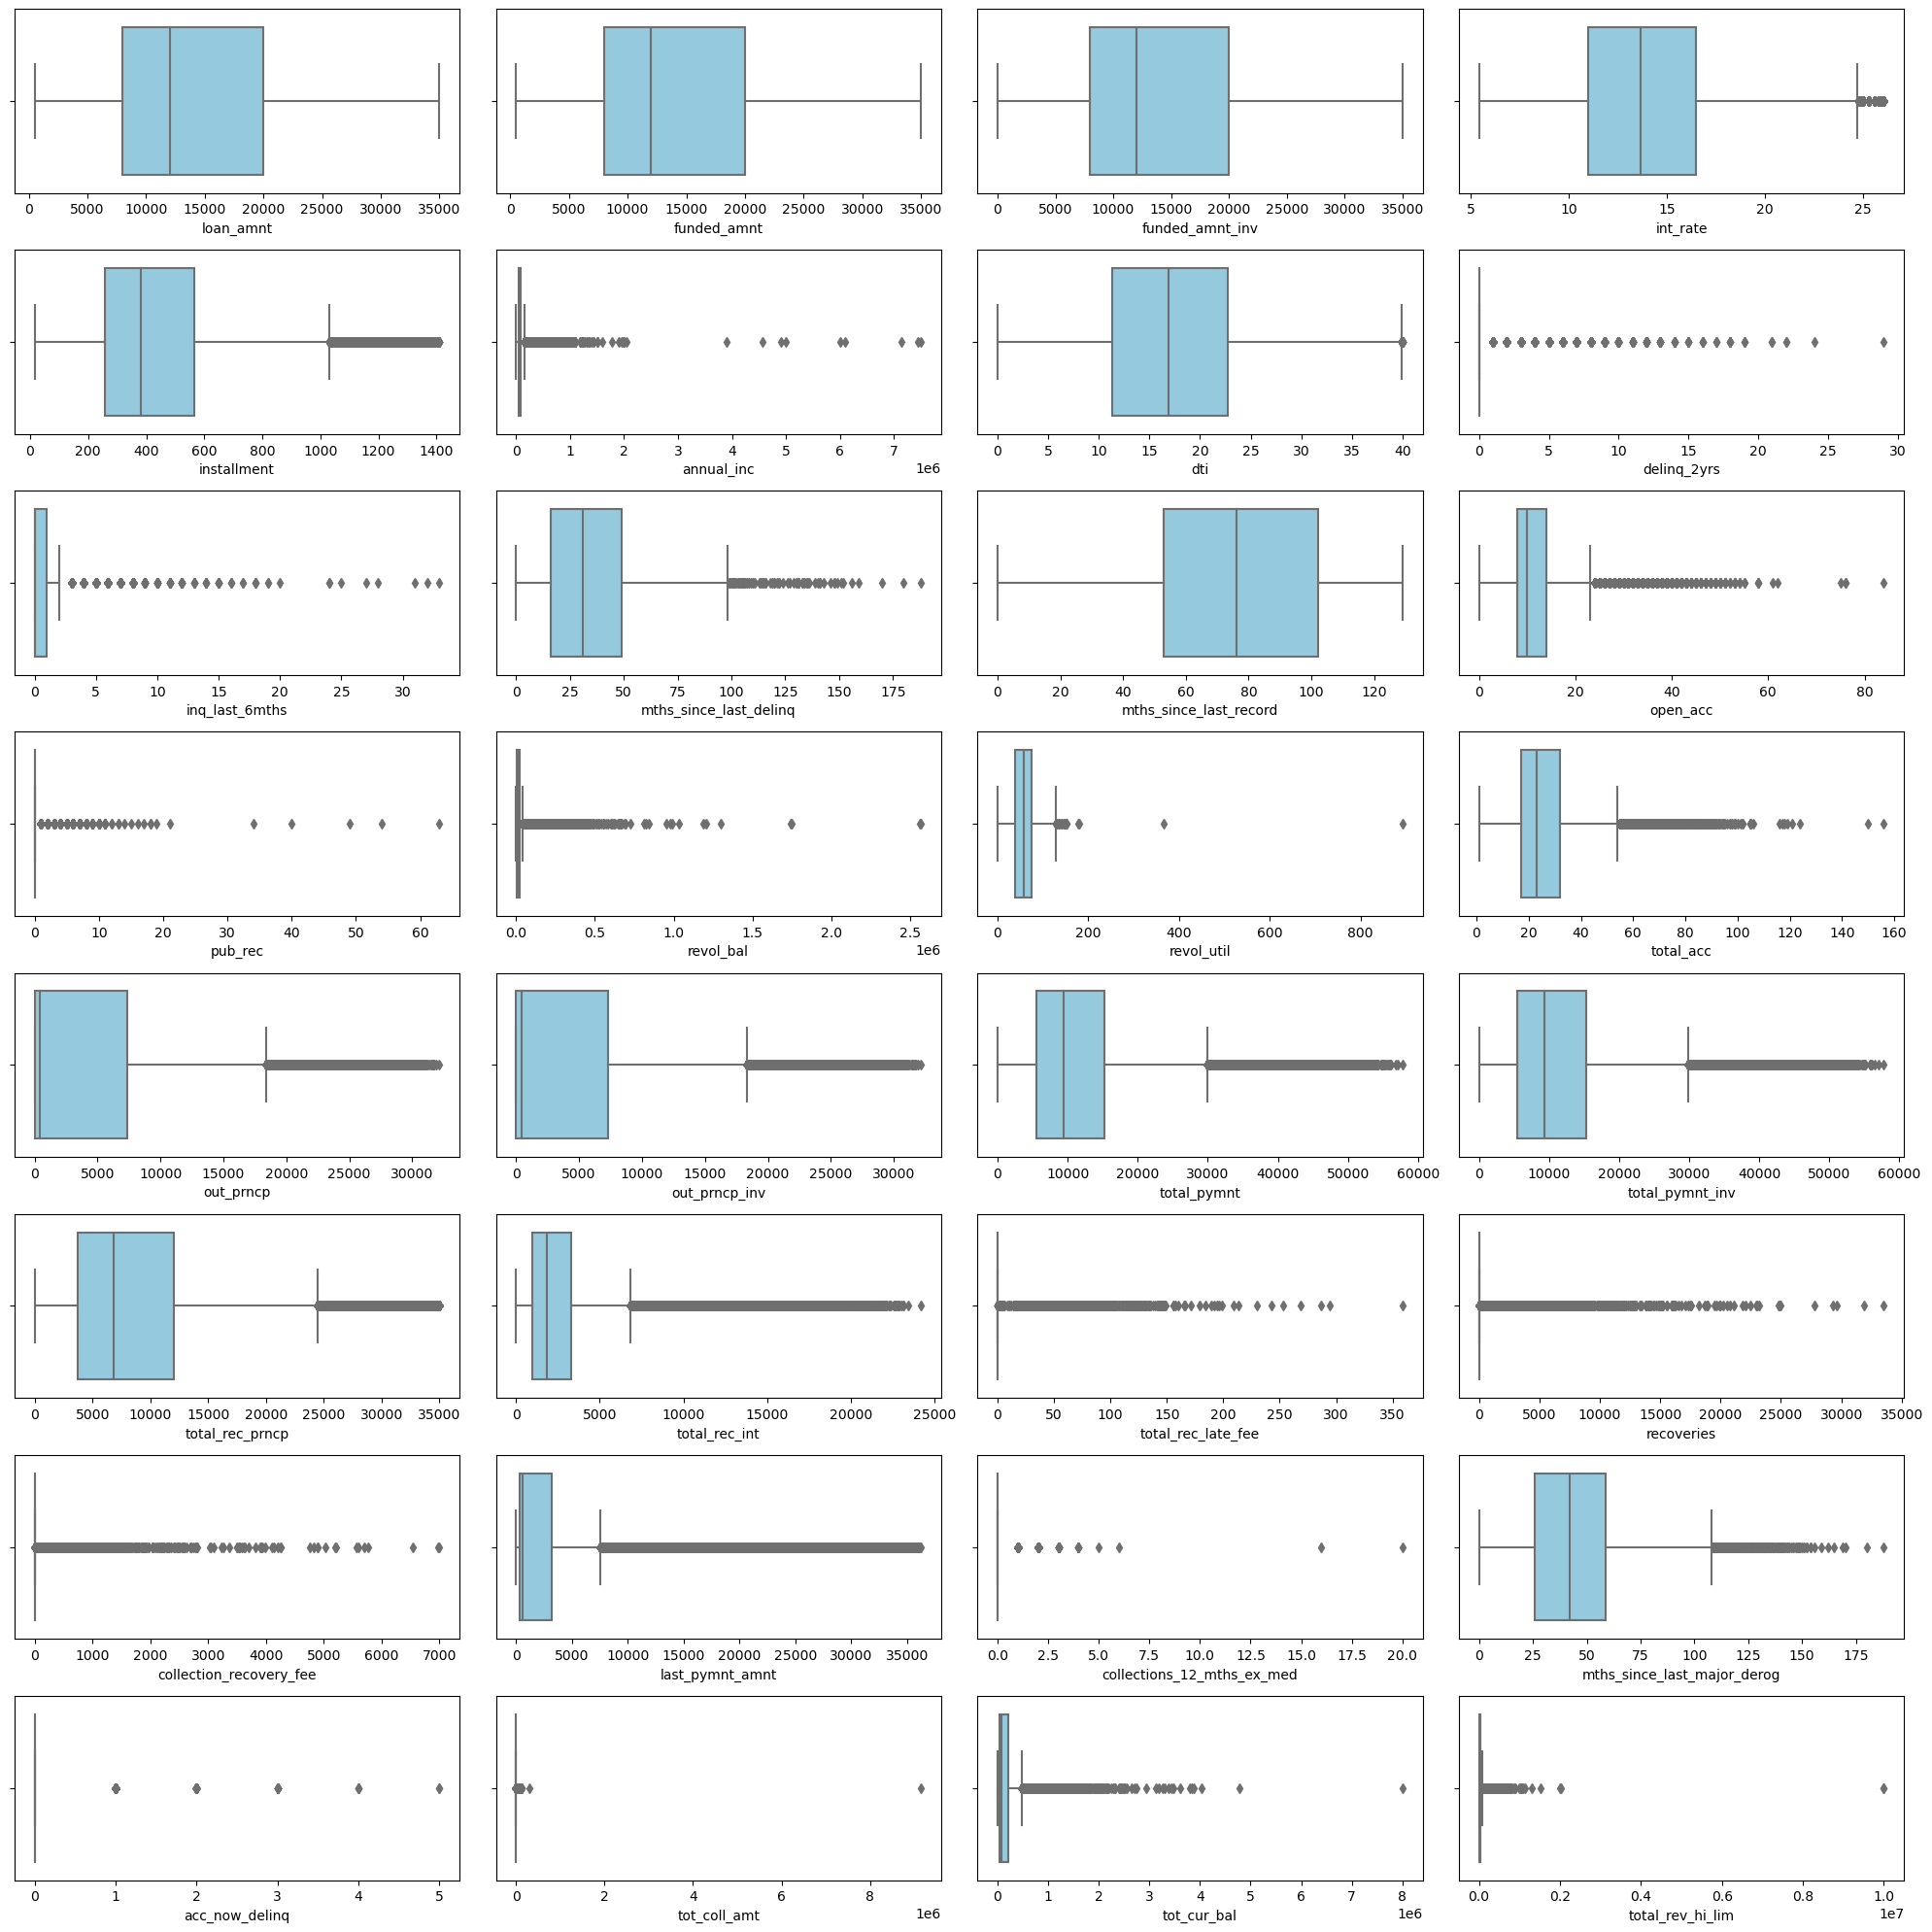

In [31]:
plt.figure(figsize=(20,20))
for i in range(0, len(num)):
    plt.subplot(8, 4, i+1)
    sns.boxplot(x=df_clean[num[i]], color='skyblue')
    plt.xlabel(num[i])
    plt.tight_layout()

## Multivariate Analysis 

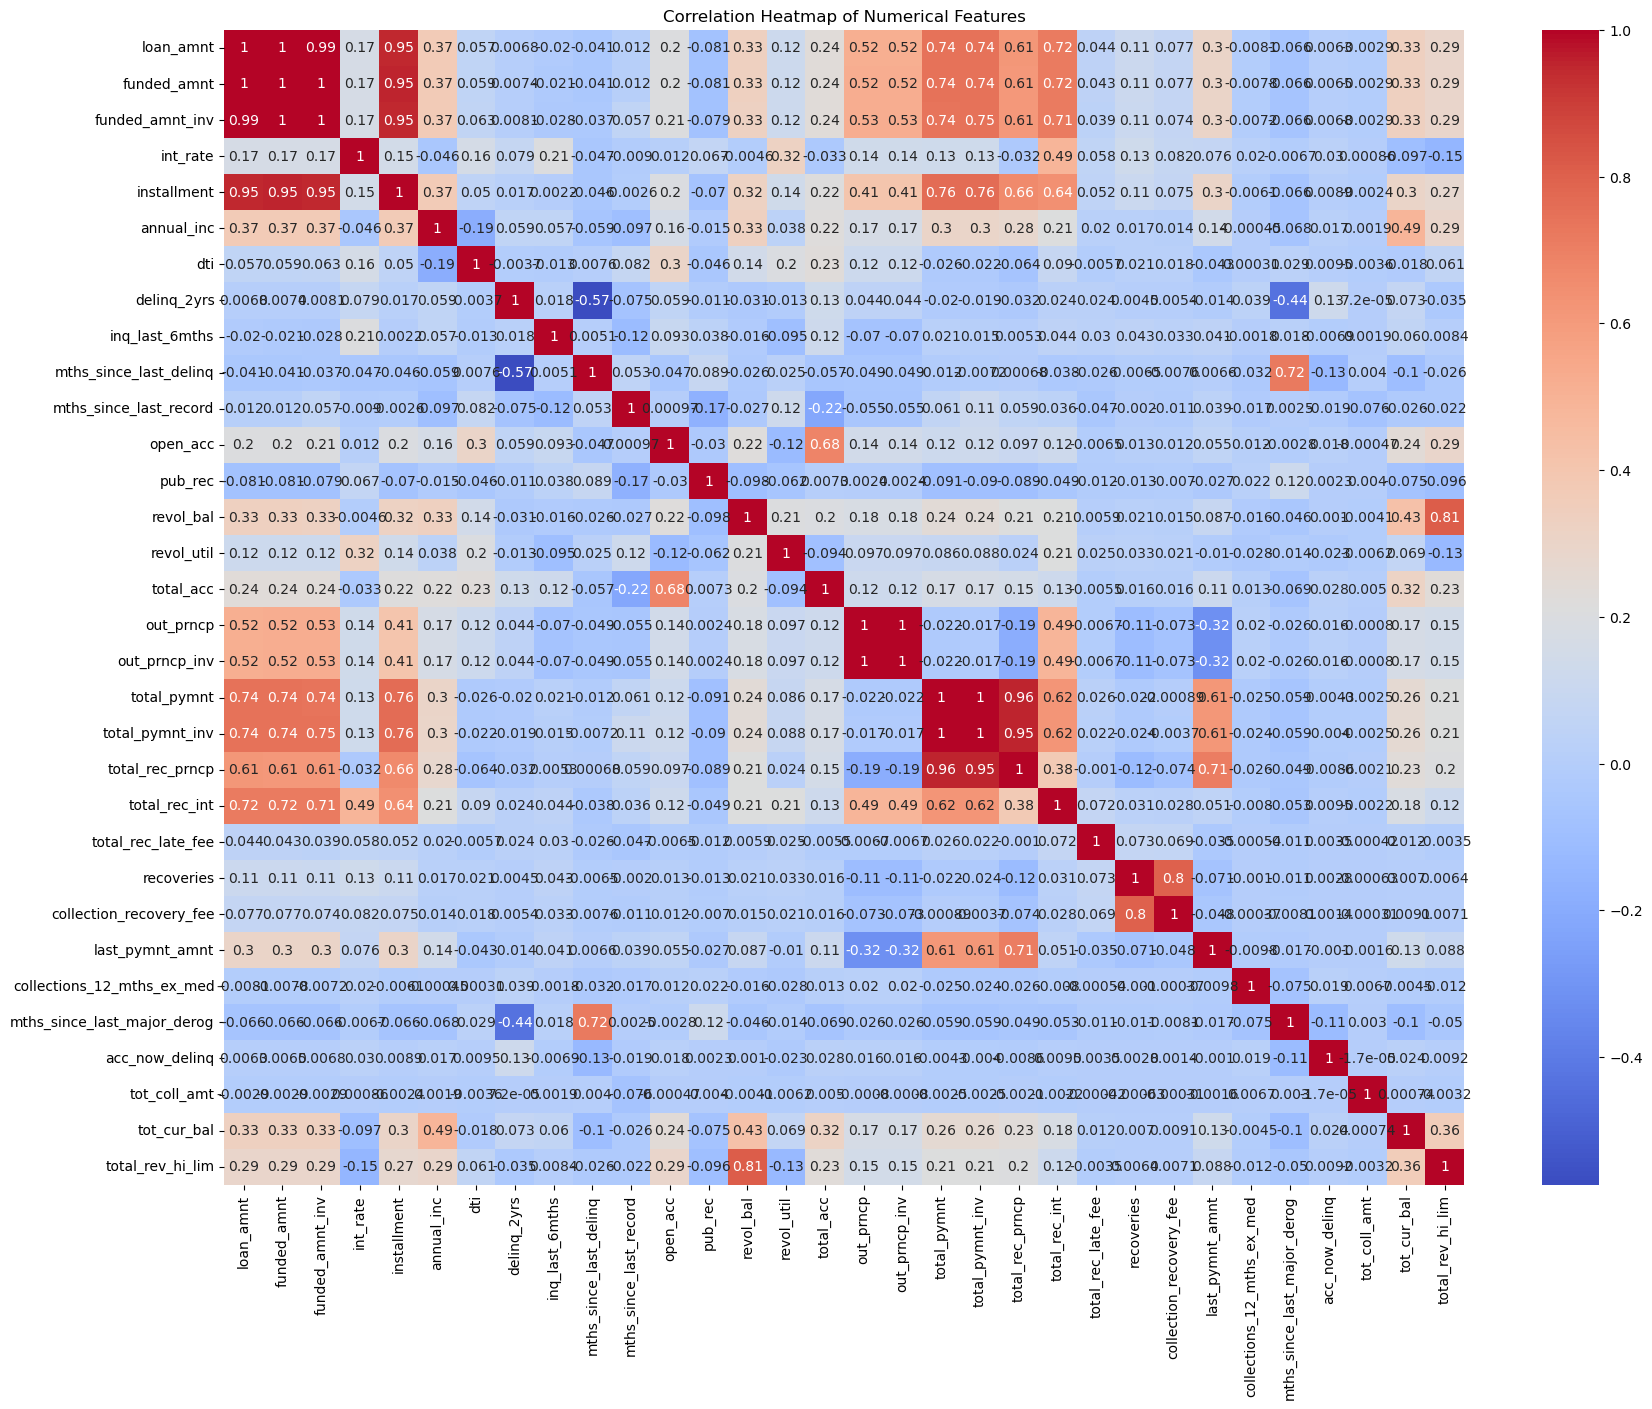

In [32]:
numerical_corr_matrix = df_clean[num].corr()
plt.subplots(figsize=(20, 15))

sns.heatmap(numerical_corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

## Trends Analysis

In [33]:
df_clean['emp_length'] = df_clean['emp_length'].fillna(df_clean['emp_length'].mode()[0])
df_clean['earliest_cr_line'] = df_clean['earliest_cr_line'].fillna(df_clean['earliest_cr_line'].mode()[0])
df_clean['last_pymnt_d'] = df_clean['last_pymnt_d'].fillna(df_clean['last_pymnt_d'].mode()[0])
df_clean['last_credit_pull_d'] = df_clean['last_credit_pull_d'].fillna(df_clean['last_credit_pull_d'].mode()[0])

In [34]:
df_trends = df_clean.copy()

In [35]:
def parse_date(x):
    try:
        dt = pd.to_datetime(x, format="%b-%y")
        return pd.Series([dt.strftime("%m"), dt.strftime("%Y")])
    except ValueError:
        return pd.Series(["", ""])

In [36]:
df_trends[["earliest_cr_line_month", "earliest_cr_line_year"]] = df_trends["earliest_cr_line"].apply(parse_date)
df_trends[["last_pymnt_d_month", "last_pymnt_d_year"]] = df_trends["last_pymnt_d"].apply(parse_date)
df_trends[["last_credit_pull_d_month", "last_credit_pull_d_year"]] = df_trends["last_credit_pull_d"].apply(parse_date)
df_trends[["issue_d_month", "issue_d_year"]] = df_trends["issue_d"].apply(parse_date)

In [37]:
df_trends[['issue_d','issue_d_month','issue_d_year','earliest_cr_line', 'earliest_cr_line_month', 'earliest_cr_line_year',
     'last_pymnt_d','last_pymnt_d_month', 'last_pymnt_d_year', 
     'last_credit_pull_d','last_credit_pull_d_month','last_credit_pull_d_year']].head(5)

,issue_d,issue_d_month,issue_d_year,earliest_cr_line,earliest_cr_line_month,earliest_cr_line_year,last_pymnt_d,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d,last_credit_pull_d_month,last_credit_pull_d_year
0,Dec-11,12,2011,Jan-85,01,1985,Jan-15,01,2015,Jan-16,01,2016
1,Dec-11,12,2011,Apr-99,04,1999,Apr-13,04,2013,Sep-13,09,2013
2,Dec-11,12,2011,Nov-01,11,2001,Jun-14,06,2014,Jan-16,01,2016
3,Dec-11,12,2011,Feb-96,02,1996,Jan-15,01,2015,Jan-15,01,2015
4,Dec-11,12,2011,Jan-96,01,1996,Jan-16,01,2016,Jan-16,01,2016


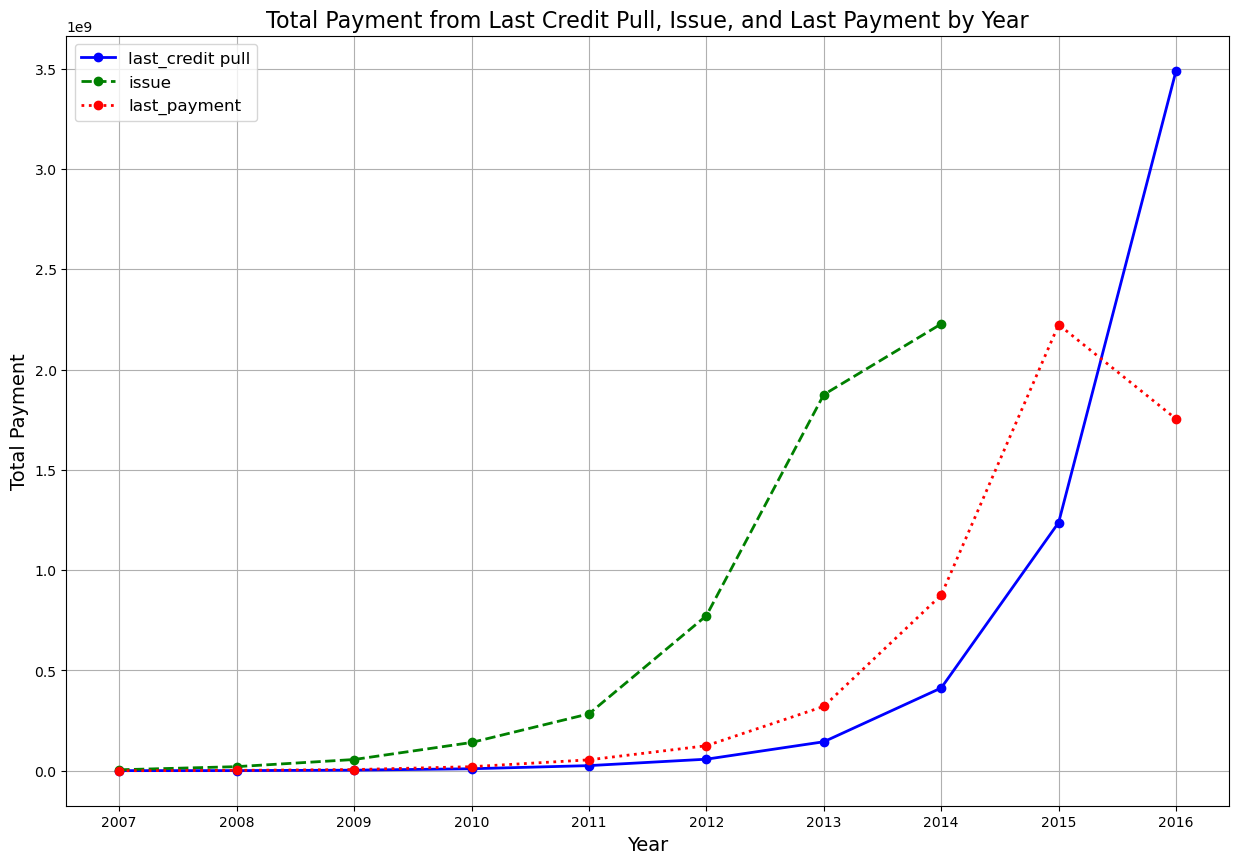

In [38]:
last_credit = df_trends[['last_credit_pull_d_year', 'total_pymnt']].groupby('last_credit_pull_d_year').sum()
issue = df_trends[['issue_d_year', 'total_pymnt']].groupby('issue_d_year').sum()
last_payment = df_trends[['last_pymnt_d_year', 'total_pymnt']].groupby('last_pymnt_d_year').sum()


fig, ax = plt.subplots(1, 1, figsize=(15, 10))
# PLOT 1

# plot setiap tahunnya
ax.plot(last_credit.index, last_credit.values, label="last_credit pull", linewidth=2, linestyle='-', marker='o',color='blue')
ax.plot(issue.index, issue.values, label="issue", linewidth=2, linestyle='--',marker='o', color='green')
ax.plot(last_payment.index, last_payment.values, label="last_payment", linewidth=2, linestyle=':', marker='o',color='red')

# menambahkan axis dan title
ax.set_xlabel("Year", fontsize=14)
ax.set_ylabel("Total Payment", fontsize=14)
ax.set_title("Total Payment from Last Credit Pull, Issue, and Last Payment by Year", fontsize=16)

# menambahkan legend
ax.legend(loc='upper left', fontsize=12)

# menambahkan grid
ax.grid(True)


In [39]:
df_trends.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,tot_cur_bal,total_rev_hi_lim,earliest_cr_line_month,earliest_cr_line_year,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year,issue_d_month,issue_d_year
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,01,1985,01,2015,01,2016,12,2011
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,04,1999,04,2013,09,2013,12,2011
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,11,2001,06,2014,01,2016,12,2011
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,02,1996,01,2015,01,2015,12,2011
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,01,1996,01,2016,01,2016,12,2011


In [40]:
df_clean = df_trends.copy()

# Data Preprocessing

## Handling Null Value

In [41]:
numerical = df_clean.select_dtypes(include=[np.number])

In [42]:
numerical.isnull().sum()

id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
int_rate                            0
installment                         0
annual_inc                          4
dti                                 0
delinq_2yrs                        29
inq_last_6mths                     29
mths_since_last_delinq         250351
mths_since_last_record         403647
open_acc                           29
pub_rec                            29
revol_bal                           0
revol_util                        340
total_acc                          29
out_prncp                           0
out_prncp_inv                       0
total_pymnt                         0
total_pymnt_inv                     0
total_rec_prncp                     0
total_rec_int                       0
total_rec_late_fee                  0
recoveries                          0
collection_r

In [43]:
df_clean['annual_inc'].fillna(df_clean['annual_inc'].median(), inplace=True)
df_clean['delinq_2yrs'].fillna(df_clean['delinq_2yrs'].median(), inplace=True)
df_clean['inq_last_6mths'].fillna(df_clean['inq_last_6mths'].median(), inplace=True)
df_clean['open_acc'].fillna(df_clean['open_acc'].median(), inplace=True)
df_clean['pub_rec'].fillna(df_clean['pub_rec'].median(), inplace=True)
df_clean['total_acc'].fillna(df_clean['total_acc'].median(), inplace=True)
df_clean['revol_util'].fillna(df_clean['revol_util'].median(), inplace=True)
df_clean['collections_12_mths_ex_med'].fillna(df_clean['collections_12_mths_ex_med'].median(), inplace=True)
df_clean['tot_coll_amt'].fillna(df_clean['tot_coll_amt'].median(), inplace=True)
df_clean['tot_cur_bal'].fillna(df_clean['tot_cur_bal'].median(), inplace=True)
df_clean['total_rev_hi_lim'].fillna(df_clean['total_rev_hi_lim'].median(), inplace=True)
df_clean['acc_now_delinq'].fillna(df_clean['acc_now_delinq'].median(), inplace=True)

In [44]:
categorical = df_clean.select_dtypes(exclude=[np.number])
categorical.isnull().sum()

term                             0
grade                            0
sub_grade                        0
emp_length                       0
home_ownership                   0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
purpose                          0
earliest_cr_line                 0
initial_list_status              0
last_pymnt_d                     0
next_pymnt_d                227214
last_credit_pull_d               0
earliest_cr_line_month           0
earliest_cr_line_year            0
last_pymnt_d_month               0
last_pymnt_d_year                0
last_credit_pull_d_month         0
last_credit_pull_d_year          0
issue_d_month                    0
issue_d_year                     0
dtype: int64

In [45]:
# Drop Data dengan nilai null yang banyak

print('dimensi dataset sebelum di drop = ',df_clean.shape)
df_clean = df_clean.drop(columns=['next_pymnt_d','mths_since_last_major_derog','mths_since_last_delinq','mths_since_last_record'], axis=1)

# Drop Kolom degan format bulan-tahun yang sebelumnya sudah dipisahkan
df_clean = df_clean.drop(columns=['issue_d','earliest_cr_line','last_credit_pull_d','last_pymnt_d'], axis=1)
print('dimensi dataset setelah di drop = ',df_clean.shape)

dimensi dataset sebelum di drop =  (466285, 57)
dimensi dataset setelah di drop =  (466285, 49)


## Remove Multicolliear Features

In [46]:
df_clean = df_clean.drop(columns=['loan_amnt', 'revol_bal', 'funded_amnt', 'funded_amnt_inv', 'installment',  
                   'total_pymnt_inv',  'out_prncp_inv',  'total_acc'], axis=1)

In [47]:
df_clean.isnull().sum()

id                            0
member_id                     0
term                          0
int_rate                      0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
loan_status                   0
pymnt_plan                    0
purpose                       0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_util                    0
initial_list_status           0
out_prncp                     0
total_pymnt                   0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
last_pymnt_amnt               0
collections_12_mths_ex_med    0
acc_now_delinq                0
tot_coll_amt                  0
tot_cur_

In [48]:
df_clean.columns

Index(['id', 'member_id', 'term', 'int_rate', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'pymnt_plan', 'purpose', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util',
       'initial_list_status', 'out_prncp', 'total_pymnt', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'earliest_cr_line_month',
       'earliest_cr_line_year', 'last_pymnt_d_month', 'last_pymnt_d_year',
       'last_credit_pull_d_month', 'last_credit_pull_d_year', 'issue_d_month',
       'issue_d_year'],
      dtype='object')

# Target Feature Engineering

In [49]:
status_counts = df_clean["loan_status"].value_counts()

# Print the value counts
print(status_counts)

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64


In [50]:
# membuat label
bad = ['Charged Off', 'Default' , 'Does not meet the credit policy. Status:Charged Off', 'Late (31-120 days)','Late (16-30 days)']
df_clean['target'] = np.where(df_clean['loan_status'].isin(bad), 1, 0)

In [51]:
status_counts = df_clean["target"].value_counts()

# Print the value counts
print(status_counts)

0    414099
1     52186
Name: target, dtype: int64


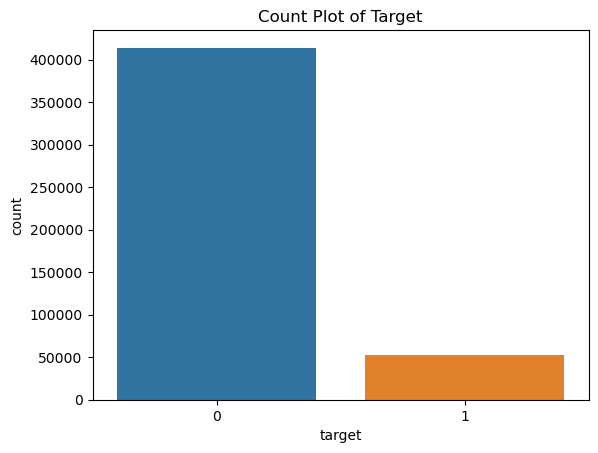

In [52]:
sns.countplot(x="target", data=df_clean)

# Memberikan judul pada plot
plt.title("Count Plot of Target")

# Menampilkan plot
plt.show()

## Other Visualization

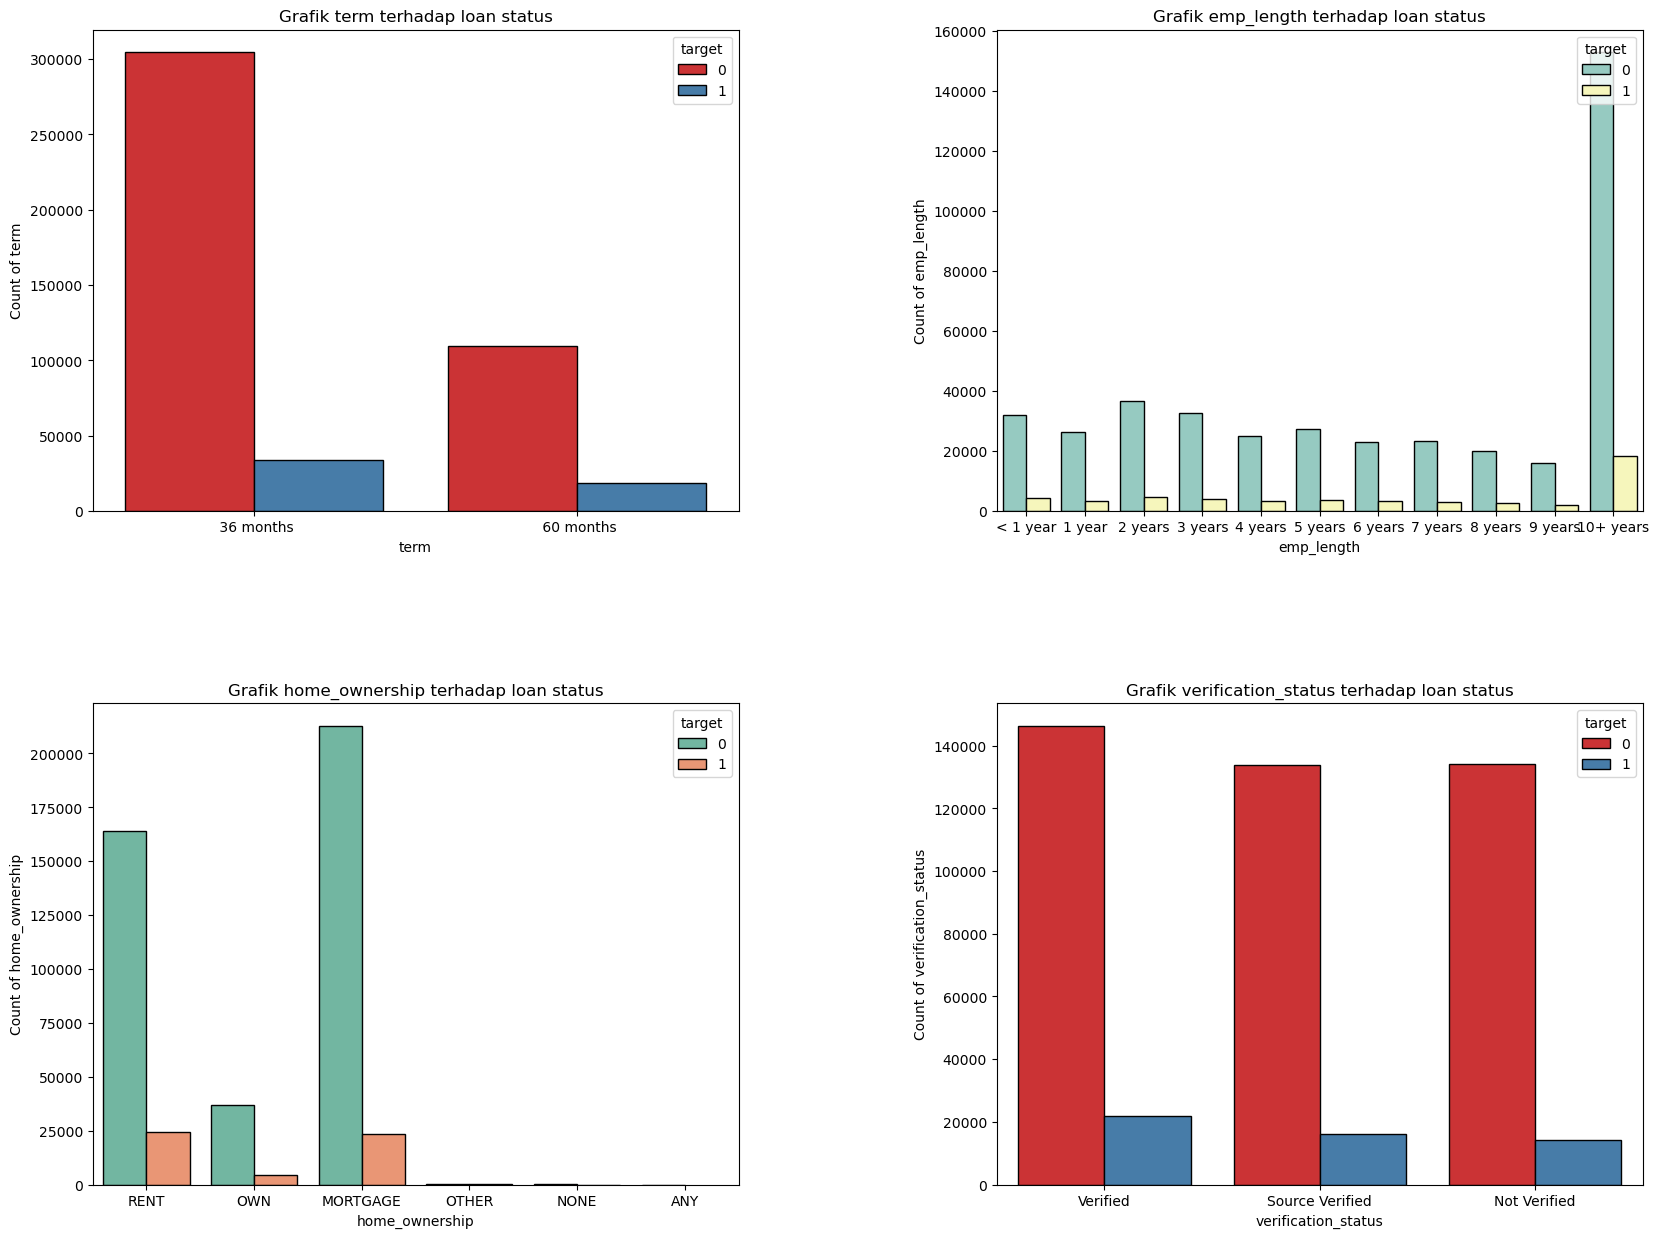

In [53]:
fig, (axs) = plt.subplots(2, 2, figsize=(20, 15))

# Create first countplot on first subplot
sns.countplot(x="term", hue="target", data=df_clean, palette="Set1",
                   edgecolor="black", linewidth=1, ax=axs[0, 0])
axs[0, 0].set_title("Grafik term terhadap loan status")
axs[0, 0].set_xlabel("term")
axs[0, 0].set_ylabel("Count of term")
axs[0, 0].legend(title="target", loc="upper right")


# Create second countplot on second subplot
sns.countplot(x="emp_length", hue="target", data=df_clean, palette="Set3",
                   edgecolor="black", linewidth=1, ax=axs[0, 1])
axs[0, 1].set_title("Grafik emp_length terhadap loan status")
axs[0, 1].set_xlabel("emp_length")
axs[0, 1].set_ylabel("Count of emp_length")
axs[0, 1].legend(title="target", loc="upper right")


# Create first countplot on first subplot
sns.countplot(x="home_ownership", hue="target", data=df_clean, palette="Set2",
                   edgecolor="black", linewidth=1, ax=axs[1, 0])
axs[1, 0].set_title("Grafik home_ownership terhadap loan status")
axs[1, 0].set_xlabel("home_ownership")
axs[1, 0].set_ylabel("Count of home_ownership")
axs[1, 0].legend(title="target", loc="upper right")

# Create second countplot on second subplot
sns.countplot(x="verification_status", hue="target", data=df_clean, palette="Set1",
                   edgecolor="black", linewidth=1, ax=axs[1, 1])
axs[1, 1].set_title("Grafik verification_status terhadap loan status")
axs[1, 1].set_xlabel("verification_status")
axs[1, 1].set_ylabel("Count of verification_status")
axs[1, 1].legend(title="target", loc="upper right")

plt.subplots_adjust(hspace=0.4, wspace=0.4)

# Show the plot
plt.show()

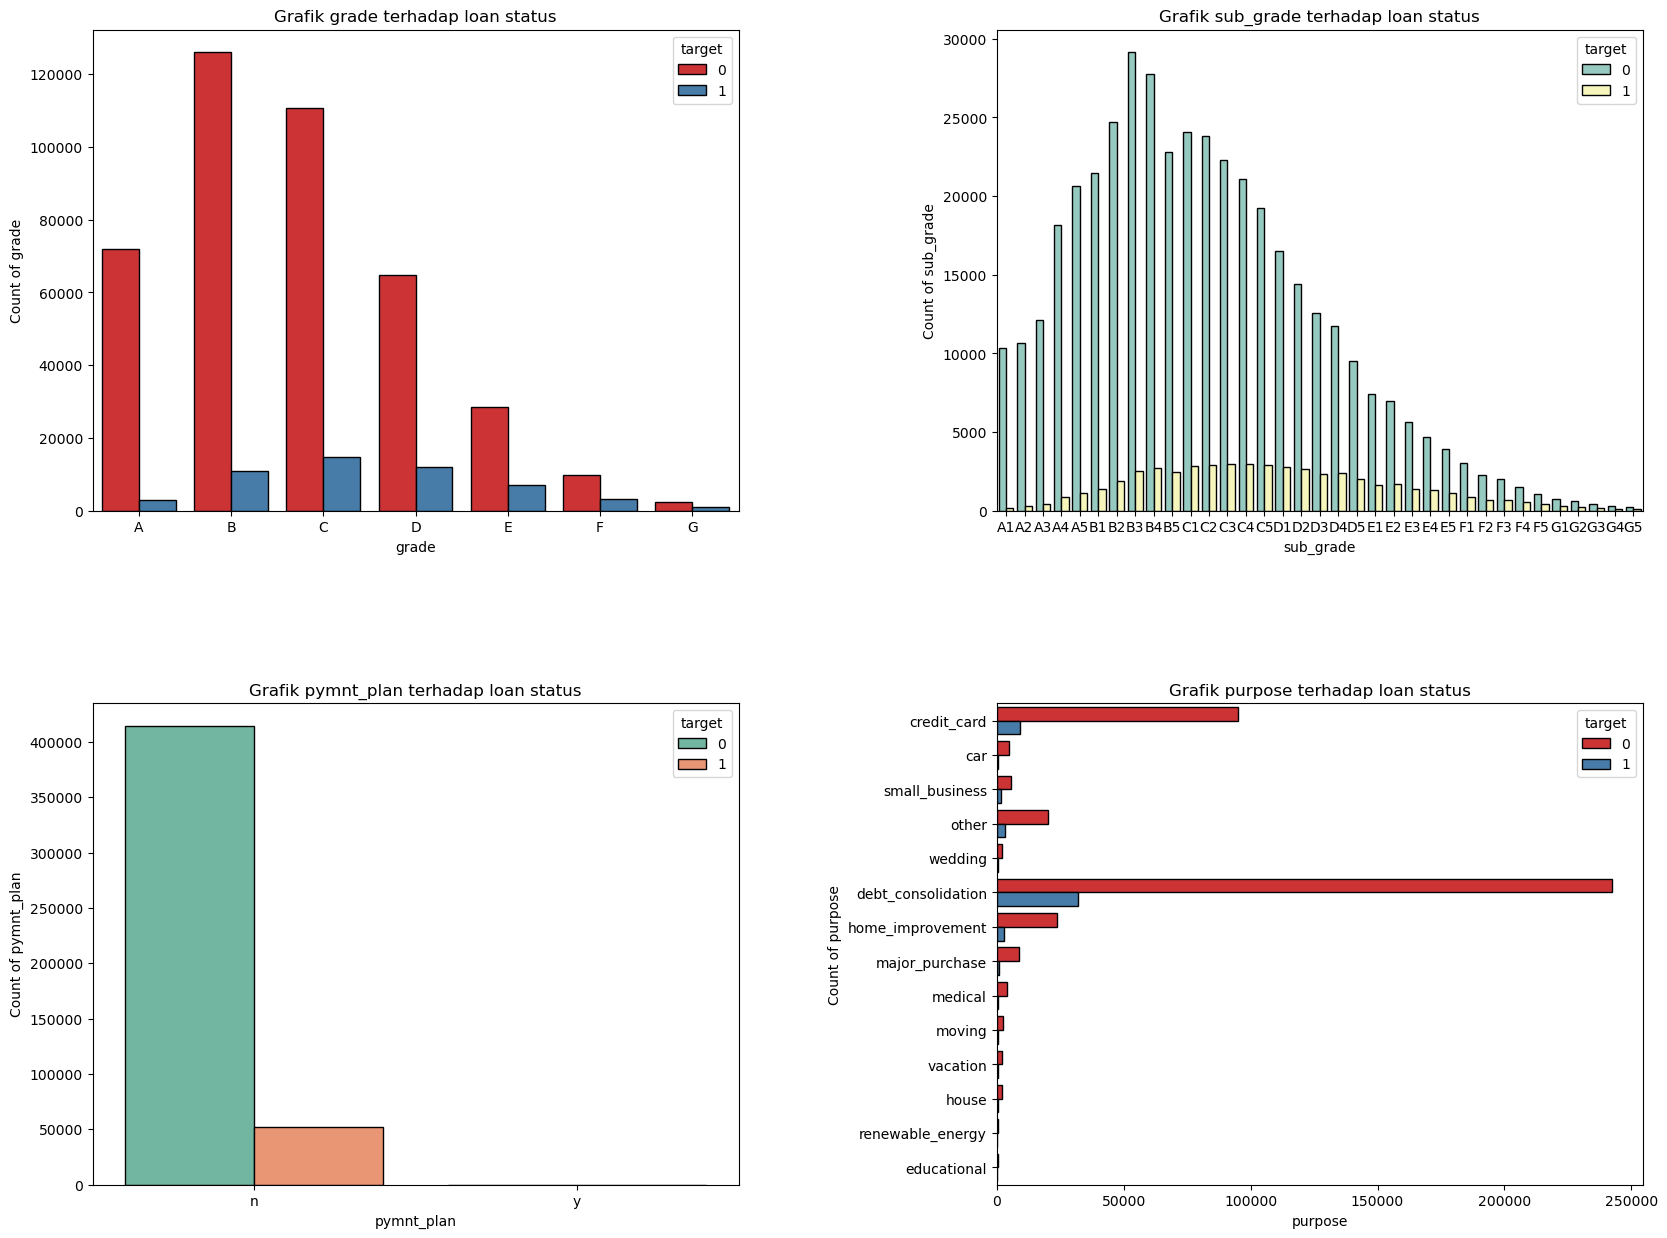

In [54]:
fig, (axs) = plt.subplots(2, 2, figsize=(20, 15))

# Create first countplot on first subplot
sns.countplot(x="grade", hue="target", data=df_clean, palette="Set1",
                   edgecolor="black", linewidth=1, ax=axs[0, 0])
axs[0, 0].set_title("Grafik grade terhadap loan status")
axs[0, 0].set_xlabel("grade")
axs[0, 0].set_ylabel("Count of grade")
axs[0, 0].legend(title="target", loc="upper right")


# Create second countplot on second subplot
sns.countplot(x="sub_grade", hue="target", data=df_clean, palette="Set3",
                   edgecolor="black", linewidth=1, ax=axs[0, 1])
axs[0, 1].set_title("Grafik sub_grade terhadap loan status")
axs[0, 1].set_xlabel("sub_grade")
axs[0, 1].set_ylabel("Count of sub_grade")
axs[0, 1].legend(title="target", loc="upper right")


# Create first countplot on first subplot
sns.countplot(x="pymnt_plan", hue="target", data=df_clean, palette="Set2",
                   edgecolor="black", linewidth=1, ax=axs[1, 0])
axs[1, 0].set_title("Grafik pymnt_plan terhadap loan status")
axs[1, 0].set_xlabel("pymnt_plan")
axs[1, 0].set_ylabel("Count of pymnt_plan")
axs[1, 0].legend(title="target", loc="upper right")

# Create second countplot on second subplot
sns.countplot(y="purpose", hue="target", data=df_clean, palette="Set1",
                   edgecolor="black", linewidth=1, ax=axs[1, 1])
axs[1, 1].set_title("Grafik purpose terhadap loan status")
axs[1, 1].set_xlabel("purpose")
axs[1, 1].set_ylabel("Count of purpose")
axs[1, 1].legend(title="target", loc="upper right")

plt.subplots_adjust(hspace=0.4, wspace=0.4)

# Show the plot
plt.show()

## Feature Encoding

In [55]:
categorical1 = ['term', 'grade','emp_length', 'home_ownership',
       'verification_status', 'pymnt_plan',
       'purpose', 'initial_list_status']

In [56]:
for cat in categorical1:
    onehots = pd.get_dummies(df_clean[cat], prefix=cat)
    df_clean = df_clean.join(onehots)

In [57]:
df_clean = df_clean.drop(['id','member_id','term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'loan_status',
       'verification_status', 'pymnt_plan',
       'purpose','initial_list_status'],axis=1)
df_clean.head(5)

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,out_prncp,total_pymnt,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_f,initial_list_status_w
0,10.65,24000.0,27.65,0.0,1.0,3.0,0.0,83.7,0.0,5861.071414,...,0,0,0,0,0,0,0,0,1,0
1,15.27,30000.0,1.00,0.0,5.0,3.0,0.0,9.4,0.0,1008.710000,...,0,0,0,0,0,0,0,0,1,0
2,15.96,12252.0,8.72,0.0,2.0,2.0,0.0,98.5,0.0,3003.653644,...,0,0,0,0,0,1,0,0,1,0
3,13.49,49200.0,20.00,0.0,1.0,10.0,0.0,21.0,0.0,12226.302210,...,0,0,0,1,0,0,0,0,1,0
4,12.69,80000.0,17.94,0.0,0.0,15.0,0.0,53.9,766.9,3242.170000,...,0,0,0,1,0,0,0,0,1,0


In [58]:
df_clean.isnull().sum()

int_rate                  0
annual_inc                0
dti                       0
delinq_2yrs               0
inq_last_6mths            0
                         ..
purpose_small_business    0
purpose_vacation          0
purpose_wedding           0
initial_list_status_f     0
initial_list_status_w     0
Length: 77, dtype: int64

In [59]:
X = df_clean.drop(columns='target') 
y = df_clean['target'] 

print("Label shape:")
print(y.shape)

print("Features shape:")
print(X.shape)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Label shape:
(466285,)
Features shape:
(466285, 76)


In [60]:
df_clean

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,out_prncp,total_pymnt,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_f,initial_list_status_w
0,10.65,24000.0,27.65,0.0,1.0,3.0,0.0,83.7,0.00,5861.071414,...,0,0,0,0,0,0,0,0,1,0
1,15.27,30000.0,1.00,0.0,5.0,3.0,0.0,9.4,0.00,1008.710000,...,0,0,0,0,0,0,0,0,1,0
2,15.96,12252.0,8.72,0.0,2.0,2.0,0.0,98.5,0.00,3003.653644,...,0,0,0,0,0,1,0,0,1,0
3,13.49,49200.0,20.00,0.0,1.0,10.0,0.0,21.0,0.00,12226.302210,...,0,0,0,1,0,0,0,0,1,0
4,12.69,80000.0,17.94,0.0,0.0,15.0,0.0,53.9,766.90,3242.170000,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,14.47,110000.0,19.85,0.0,2.0,18.0,0.0,77.6,12574.00,10383.360000,...,0,0,0,0,0,0,0,0,0,1
466281,19.97,78000.0,18.45,0.0,5.0,18.0,1.0,46.3,0.00,4677.920000,...,0,0,0,0,0,0,0,0,1,0
466282,16.99,46000.0,25.65,0.0,2.0,18.0,0.0,51.1,14428.31,12343.980000,...,0,0,0,0,0,0,0,0,1,0
466283,7.90,83000.0,5.39,3.0,1.0,21.0,0.0,21.5,0.00,2126.579838,...,0,0,0,0,0,0,0,0,0,1


## Modelling Data with imbalanced data

## Decision Tree

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix

dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train,y_train)

y_train_pred = dt.predict(X_train)
y_pred = dt.predict(X_test)

In [62]:
print('Training set score: {:.4f}'.format(dt.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(dt.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9844


In [63]:
test_report = classification_report(y_true=y_test, y_pred=dt.predict(X_test))
print(test_report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     82733
           1       0.93      0.93      0.93     10524

    accuracy                           0.98     93257
   macro avg       0.96      0.96      0.96     93257
weighted avg       0.98      0.98      0.98     93257



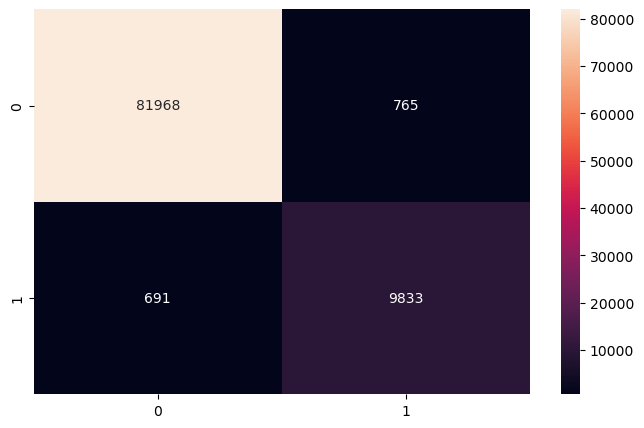

In [64]:
conf = confusion_matrix(y_true=y_test, y_pred=dt.predict(X_test))
plt.figure(figsize=(8, 5))
sns.heatmap(conf, annot=True, fmt="g")
plt.show()

# Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(max_iter=500, n_jobs=-1)
log.fit(X_train, y_train)


LogisticRegression(max_iter=500, n_jobs=-1)

In [66]:
print('Training set score: {:.4f}'.format(log.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(log.score(X_test, y_test)))

Training set score: 0.9486
Test set score: 0.9489


In [67]:
report = classification_report(y_true=y_test, y_pred=log.predict(X_test))
print(report)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     82733
           1       0.96      0.57      0.72     10524

    accuracy                           0.95     93257
   macro avg       0.95      0.78      0.84     93257
weighted avg       0.95      0.95      0.94     93257



In [68]:
conf = confusion_matrix(y_true=y_test, y_pred=log.predict(X_test))

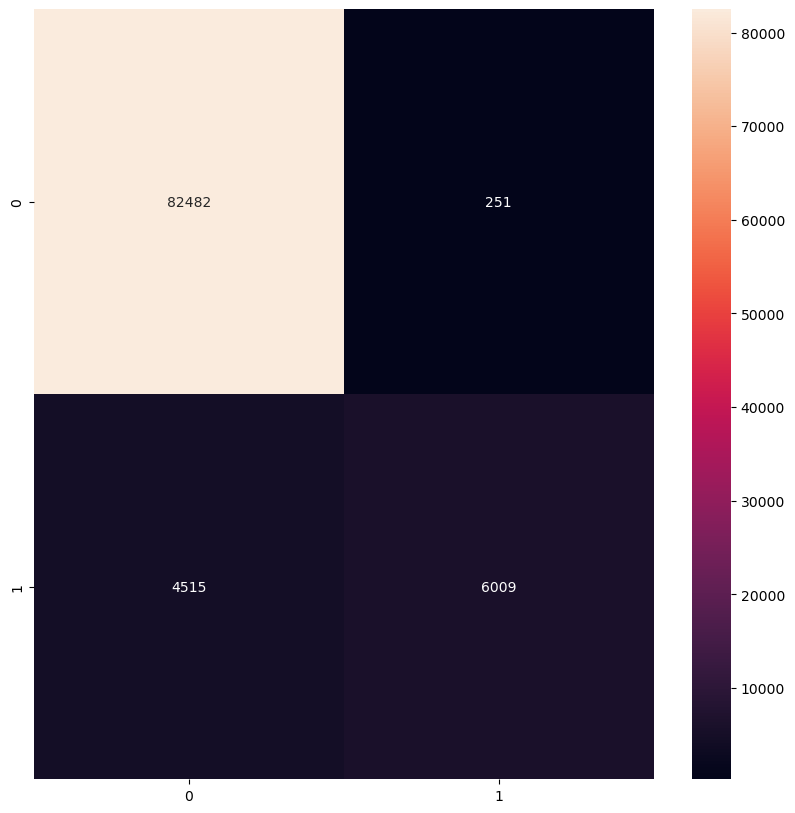

In [69]:
plt.figure(figsize=(10, 10))
sns.heatmap(conf, annot=True, fmt="g")
plt.show()

# Random Forest

In [70]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=1)
rf_model.fit(X_train,y_train)
rf_pred=rf_model.predict(X_test)
print(('Accuracy Model:'), accuracy_score(y_test,rf_pred)*100)

Accuracy Model: 99.07138338140837


In [71]:
print('Training set score: {:.4f}'.format(rf_model.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(rf_model.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9907


In [72]:
print(classification_report(y_test, rf_pred))

print("CONFUSION MATRIX")
cnf_matrix=confusion_matrix(y_test, rf_pred)
print(cnf_matrix)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     82733
           1       1.00      0.92      0.96     10524

    accuracy                           0.99     93257
   macro avg       0.99      0.96      0.98     93257
weighted avg       0.99      0.99      0.99     93257

CONFUSION MATRIX
[[82705    28]
 [  838  9686]]


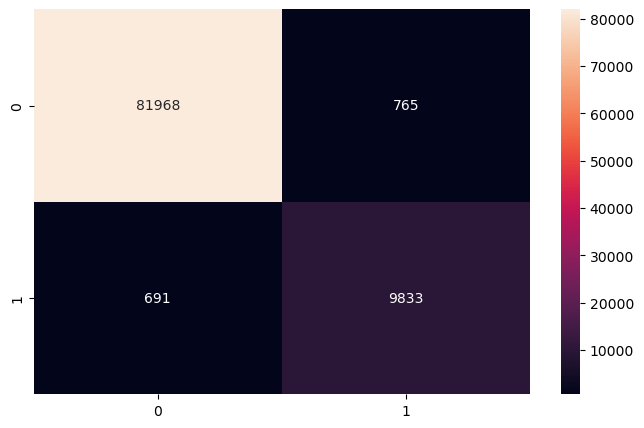

In [73]:
conf = confusion_matrix(y_true=y_test, y_pred=dt.predict(X_test))
plt.figure(figsize=(8, 5))
sns.heatmap(conf, annot=True, fmt="g")
plt.show()

## Modelling with SMOTE 

In [74]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
# Overampling with smote
from imblearn.over_sampling import SMOTE 
from imblearn import over_sampling
X_over_smote, y_over_smote = over_sampling.SMOTE().fit_resample(X_train, y_train)

In [76]:
X_train_, X_test, y_train_, y_test = train_test_split(X_over_smote, y_over_smote, test_size=0.2, random_state=42)

In [77]:
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train_,y_train_)

dt_train_pred = dt.predict(X_train_)
dt_test_pred = dt.predict(X_test)
dt_val_pred=dt.predict(X_val)

In [78]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=1)
rf_model.fit(X_train_,y_train_)

rf_train_pred = rf_model.predict(X_train_)
rf_test_pred=rf_model.predict(X_test)
rf_val_pred=rf_model.predict(X_val)

In [79]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(max_iter=500, n_jobs=-1)
log.fit(X_train_, y_train_)

log_train_pred = log.predict(X_train_)
log_test_pred=log.predict(X_test)
log_val_pred=log.predict(X_val)

In [80]:
from sklearn.metrics import accuracy_score

model = ['DecisionTree','RandomForest','LogisticRegression']
pred_train = [dt_train_pred, rf_train_pred, log_train_pred]
pred_test = [dt_test_pred, rf_test_pred, log_test_pred]
pred_val = [dt_val_pred, rf_val_pred, log_val_pred]

train_set_accuracy = []
test_set_accuracy = []
val_set_accuracy = []

for i in pred_train:
  train_set_accuracy.append(accuracy_score(y_train_, i))

for i in pred_test:
  test_set_accuracy.append(accuracy_score(y_test, i))

for i in pred_val:
  val_set_accuracy.append(accuracy_score(y_val, i))

train_set_accuracy = [round(a * 100, 2) for a in train_set_accuracy]
test_set_accuracy = [round(a * 100, 2) for a in test_set_accuracy]
val_set_accuracy = [round(a * 100, 2) for a in val_set_accuracy]

df = pd.DataFrame(list(zip(model, train_set_accuracy, test_set_accuracy, val_set_accuracy)), columns=['Model', 'Akurasi Train', 'Akurasi Test', 'Akurasi Val'])
df_styled = df.style.format({
    'Akurasi Train': '{:.2f}%', 
    'Akurasi Test': '{:.2f}%', 
    'Akurasi Val': '{:.2f}%',
})

for column in df.columns[1:]:
    vmin = df[column].min()
    vmax = df[column].max()
    df_styled.background_gradient(subset=column, cmap='Blues', vmin=vmin, vmax=vmax)

df_styled




,Model,Akurasi Train,Akurasi Test,Akurasi Val
0,DecisionTree,100.00%,98.94%,98.28%
1,RandomForest,100.00%,99.40%,98.94%
2,LogisticRegression,88.96%,88.98%,90.10%


In [81]:
# from imblearn.over_sampling import SMOTE

# print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
# print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

# sm = SMOTE(random_state=1)
# X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

# print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
# print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

# print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
# print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

### Decision Tree

In [82]:
# dt = DecisionTreeClassifier(random_state=1)
# dt.fit(X_train_res, y_train_res)

# y_train_pred = dt.predict(X_train_res)
# y_pred = dt.predict(X_test)

In [83]:
# print('Training set score: {:.4f}'.format(dt.score(X_train_res, y_train_res)))
# print('Test set score: {:.4f}'.format(dt.score(X_test, y_test)))

In [84]:
# report = classification_report(y_true=y_test, y_pred=dt.predict(X_test))
# print(report)
# conf = confusion_matrix(y_true=y_test, y_pred=dt.predict(X_test))

In [85]:
# plt.figure(figsize=(8, 5))
# sns.heatmap(conf, annot=True, fmt="g")
# plt.show()

### Logistic Regression|

In [86]:
# log = LogisticRegression(max_iter=500, n_jobs=-1)
# log.fit(X_train_res, y_train_res)

In [87]:
# print('Training set score: {:.4f}'.format(log.score(X_train_res, y_train_res)))
# print('Test set score: {:.4f}'.format(log.score(X_test, y_test)))

In [88]:
# report = classification_report(y_true=y_test, y_pred=log.predict(X_test))
# print(report)
# conf = confusion_matrix(y_true=y_test, y_pred=log.predict(X_test))

In [89]:
# plt.figure(figsize=(8, 5))
# sns.heatmap(conf, annot=True, fmt="g")
# plt.show()

### Random Forest

In [90]:
# # rf_model = RandomForestClassifier(n_estimators=100, random_state=1)
# rf_model.fit(X_train_res, y_train_res)
# rf_pred=rf_model.predict(X_test)
# print(('Accuracy Model:'), accuracy_score(y_test,rf_pred)*100)

In [91]:
# print('Training set score: {:.4f}'.format(rf_model.score(X_train_res, y_train_res)))
# print('Test set score: {:.4f}'.format(rf_model.score(X_test, y_test)))

In [92]:
# report = classification_report(y_true=y_test, y_pred=rf_model.predict(X_test))
# print(report)
# conf = confusion_matrix(y_true=y_test, y_pred=rf_model.predict(X_test))

In [93]:
# plt.figure(figsize=(8, 5))
# sns.heatmap(conf, annot=True, fmt="g")
# plt.show()

<AxesSubplot:title={'center':'Feature Importance of Random Forest Model'}>

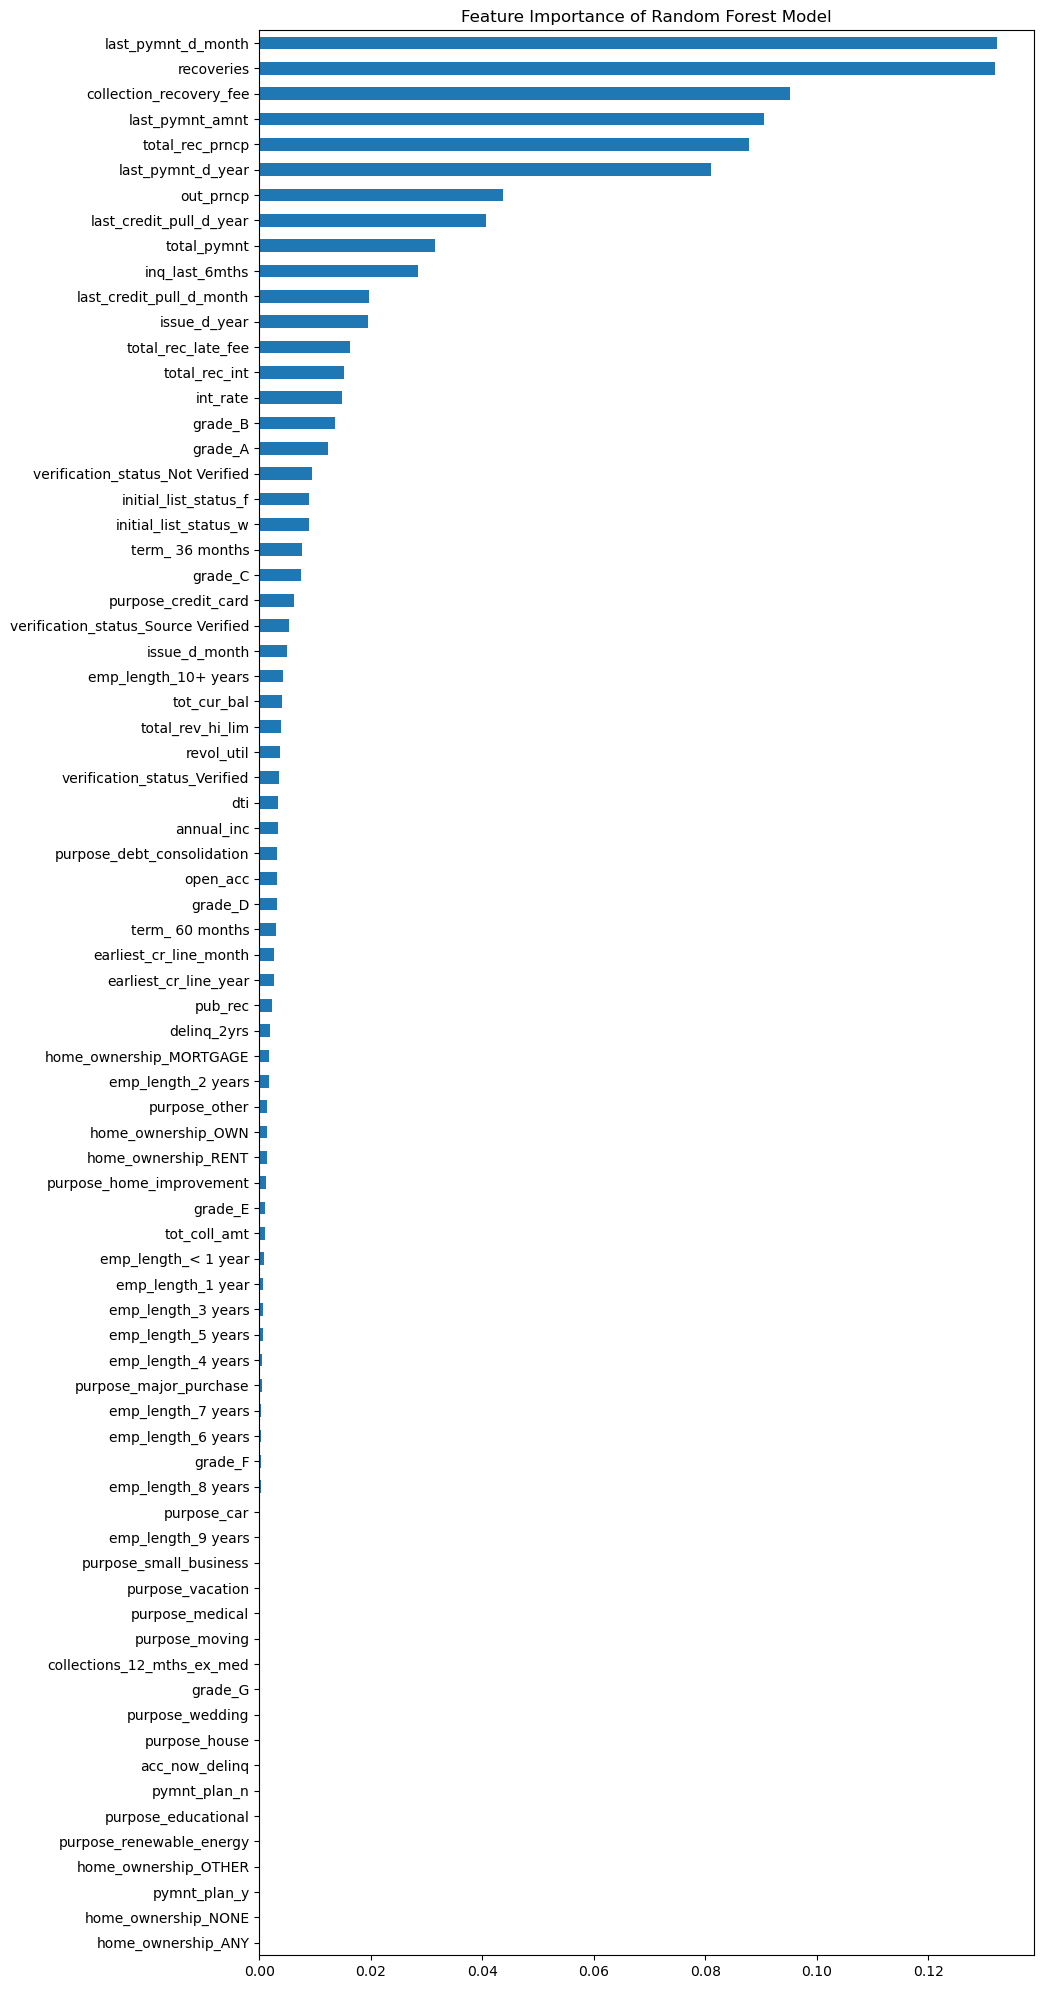

In [101]:
featimp = pd.Series(rf_model.feature_importances_, index=X_train_.columns).sort_values(ascending=True)
plt.figure(figsize=(10,25))
featimp.plot(kind='barh', title='Feature Importance of Random Forest Model')

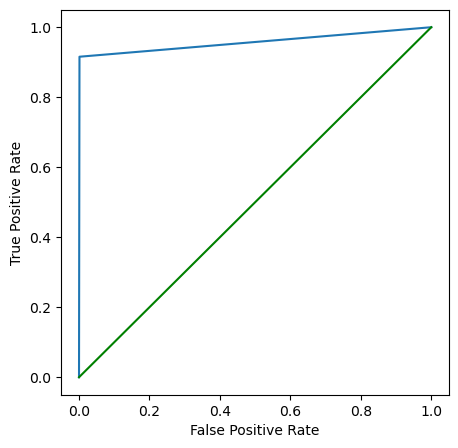

In [103]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
def plot_sklearn_roc_curve(y_val, rf_val_pred):
    fpr, tpr, _ = roc_curve(y_val, rf_val_pred)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    roc_display.figure_.set_size_inches(5,5)
    plt.plot([0, 1], [0, 1], color = 'g')
# Plots the ROC curve using the sklearn methods - Bad plot
plot_sklearn_roc_curve(y_val, rf_val_pred)

# Modelling with Undersampling

In [104]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
under = RandomUnderSampler(random_state=1)

X_under, y_under = under.fit_resample(X_train.values, y_train.ravel())
Counter(y_under)

Counter({0: 41759, 1: 41759})

In [105]:
print('udersampling data')
print(pd.Series(y_under).value_counts())

udersampling data
0    41759
1    41759
dtype: int64


In [106]:
col = X_train.columns.to_list()

X_train = pd.DataFrame(X_under, columns=col)
y_train = pd.Series(y_under)

## Decision Tree

In [107]:
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train,y_train)

y_train_pred = dt.predict(X_train)
y_pred = dt.predict(X_test)

In [108]:
print('Training set score: {:.4f}'.format(dt.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(dt.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9704


In [109]:
test_report = classification_report(y_true=y_test, y_pred=dt.predict(X_test))
print(test_report)
conf = confusion_matrix(y_true=y_test, y_pred=dt.predict(X_test))
print(conf)

              precision    recall  f1-score   support

           0       0.98      0.96      0.97     66042
           1       0.96      0.98      0.97     66466

    accuracy                           0.97    132508
   macro avg       0.97      0.97      0.97    132508
weighted avg       0.97      0.97      0.97    132508

[[63168  2874]
 [ 1044 65422]]


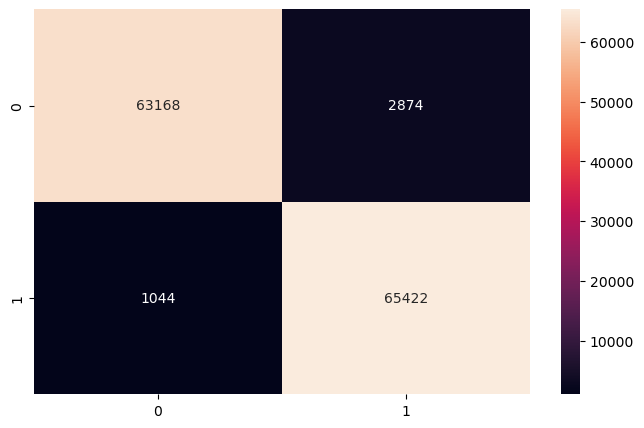

In [110]:
plt.figure(figsize=(8, 5))
sns.heatmap(conf, annot=True, fmt="g")
plt.show()

## Logistic Regression

In [111]:
log = LogisticRegression(max_iter=500, n_jobs=-1)
log.fit(X_train, y_train)

LogisticRegression(max_iter=500, n_jobs=-1)

In [112]:
print('Training set score: {:.4f}'.format(log.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(log.score(X_test, y_test)))

Training set score: 0.8615
Test set score: 0.8798


In [113]:
report = classification_report(y_true=y_test, y_pred=log.predict(X_test))
print(report)

              precision    recall  f1-score   support

           0       0.88      0.88      0.88     66042
           1       0.88      0.88      0.88     66466

    accuracy                           0.88    132508
   macro avg       0.88      0.88      0.88    132508
weighted avg       0.88      0.88      0.88    132508



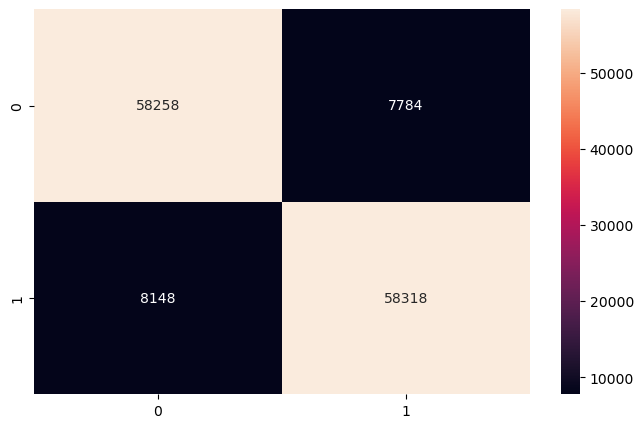

In [114]:
conf = confusion_matrix(y_true=y_test, y_pred=log.predict(X_test))
plt.figure(figsize=(8, 5))
sns.heatmap(conf, annot=True, fmt="g")
plt.show()

## Random Forest

In [115]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=1)
rf_model.fit(X_train,y_train)
rf_pred=rf_model.predict(X_test)

In [116]:
print('Training set score: {:.4f}'.format(rf_model.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(rf_model.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9860


In [117]:
print(classification_report(y_test, rf_pred))

print("CONFUSION MATRIX")
cnf_matrix=confusion_matrix(y_test, rf_pred)
print(cnf_matrix)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     66042
           1       0.99      0.98      0.99     66466

    accuracy                           0.99    132508
   macro avg       0.99      0.99      0.99    132508
weighted avg       0.99      0.99      0.99    132508

CONFUSION MATRIX
[[65286   756]
 [ 1094 65372]]


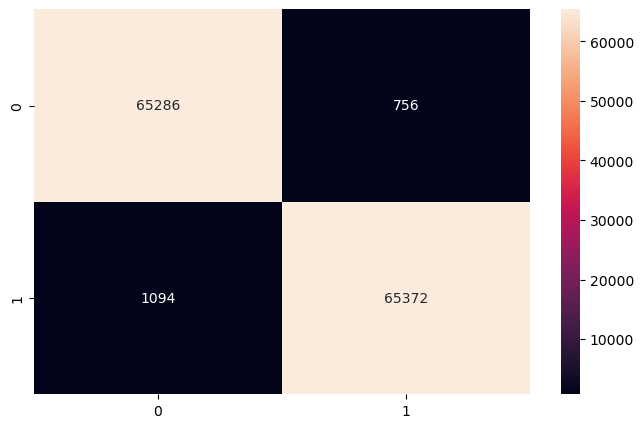

In [118]:
 plt.figure(figsize=(8, 5))
sns.heatmap(cnf_matrix, annot=True, fmt="g")
plt.show()